
<p style="text-align: center; font-size: 22px;">
   Logistic Regression-Optimization
    <br> Radwan Al Zoubi
    <br> Mays Nael Adeeb Abdel Rahman
</p>

<h2>Source of the Data</h2>
<p>
    **Citation Request**: Koklu, N., & Sulak, S.A. (2024). Using artificial intelligence techniques for the analysis of obesity status according to the individuals' social and physical activities. <i>Sinop Üniversitesi Fen Bilimleri Dergisi</i>, 9(1), 217-239. <a href="https://doi.org/10.33484/sinopfbd.1445215">https://doi.org/10.33484/sinopfbd.1445215</a>
</p>

<p>
    The data can be downloaded from Kaggle via the following link:
</p>
<ul>
<ul>
    <li><a href="https://www.kaggle.com/datasets/suleymansulak/obesity-dataset">https://www.kaggle.com/datasets/suleymansulak
</ul>




In [365]:
### Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import copy
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics as mt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from scipy.optimize import minimize_scalar
import copy
from numpy import ma
from scipy.optimize import fmin_bfgs
from numpy.linalg import pinv
from scipy.special import expit
from sklearn.preprocessing import MinMaxScaler

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            line-height: 1.6;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-top: 20px;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>

<h1>1. Preparation and Overview</h1>

<h4>1.1.1 Context and Motivation</h4>
<p>
    Obesity is a growing global health issue, significantly contributing to increased risk for chronic diseases such as heart disease, diabetes, and hypertension. According to the World Health Organization (WHO), worldwide obesity has nearly tripled since 1975, making it one of the most pressing public health concerns. This dataset aims to address the factors contributing to obesity, helping health professionals and policymakers understand behaviors that may lead to obesity and how to mitigate the risks through improved lifestyle choices.
</p>

<h4>1.1.2 Problem Statement</h4>
<p>
    The dataset contains information on 1610 individuals, with attributes ranging from demographic factors like age and sex to behavioral factors like food consumption, physical activity, and smoking habits. These factors are mapped to four classes that represent different levels of body mass index (BMI), from underweight to obesity. The objective is to create a classification model that can predict whether an individual is underweight, of normal weight, overweight, or obese based on their lifestyle and demographic information.
</p>

<h4>1.1.3 Potential Impact</h4>
<p>
    Developing a model that can predict obesity based on behavioral and demographic factors can play a significant role in preventive healthcare. It can assist healthcare providers in identifying high-risk individuals early, enabling them to offer personalized lifestyle recommendations to prevent the onset of obesity-related diseases. Furthermore, such a model can inform public health strategies, helping target populations with educational campaigns or interventions that promote healthier habits.
</p>

<h4>1.1.4 Dataset Overview</h4>
<p>
    The Obesity Dataset comprises 1,610 rows, each representing an individual and their characteristics. The dataset includes a variety of behavioral and demographic factors that could influence an individual's weight, as well as a target variable that categorizes individuals into four BMI classes. These BMI classes are based on widely accepted thresholds provided by health authorities like the World Health Organization (WHO), which are used to assess body weight categories and their associated health risks.
</p>

<table>
    <thead>
        <tr>
            <th>Category</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Underweight</td>
            <td>Individuals with a BMI less than 18.5</td>
        </tr>
        <tr>
            <td>Normal</td>
            <td>Individuals with a BMI between 18.5 and 24.9</td>
        </tr>
        <tr>
            <td>Overweight</td>
            <td>Individuals with a BMI between 25 and 29.9</td>
        </tr>
        <tr>
            <td>Obesity</td>
            <td>Individuals with a BMI of 30 or higher</td>
        </tr>
    </tbody>
</table>

<p>
    The BMI is calculated using the formula:
</p>

<pre>
    BMI = Weight in kilograms / (Height in meters)^2
</pre>

<p>
    These BMI ranges are based on population-level studies and are used as a general guide to assess whether an individual's body weight is appropriate for their height. Healthcare professionals use these thresholds to categorize individuals and to assess the risk of health problems such as heart disease, diabetes, and hypertension, which are often associated with higher BMI levels.
</p>

<h4>1.1.5 Objective and Goals</h4>
<p>
    The primary goal is to build a predictive model that can classify individuals into one of the four BMI categories with a high degree of accuracy 95%. The model will be evaluated on its ability to minimize false negatives—particularly in cases where individuals at risk for overweight or obesity are incorrectly classified as normal or underweight. Accurately identifying these individuals is essential for taking timely preventive actions to improve their health outcomes.
</p>

</body>
</html>


<h2>1.2 Data Understanding</h2>
<p>
    In this section, the dataset will be imported and its main features will be discussed. The dataset contains information on 1,610 individuals, with attributes capturing various behavioral, demographic, and physical aspects that are related to obesity. The attributes range from personal details like age and sex to lifestyle factors such as eating habits, physical activity, and smoking habits.
</p>
<p>
    Some of the key features include:
</p>
<ul>
    <li>Age: The age of the individual.</li>
    <li>Sex: The gender of the individual (Male/Female).</li>
    <li>Height: The height of the individual in centimeters.</li>
    <li>Weight: The weight of the individual in kilograms.</li>
    <li>Family history of overweight/obesity: Whether the individual comes from a family with a history of obesity.</li>
    <li>Physical activity level: The number of days per week the individual engages in physical activity.</li>
    <li>Smoking habits: Whether the individual smokes (Yes/No).</li>
    <li>Daily fast food consumption: Whether the individual consumes fast food on a regular basis (Yes/No).</li>
    <li>Vegetable consumption frequency: How often the individual consumes vegetables.</li>
    <li>Number of main meals: The number of main meals the individual consumes daily.</li>
    <li>Food intake between meals: Whether the individual consumes food between meals (e.g., snacks).</li>
    <li>Water consumption: The amount of water the individual drinks per day.</li>
    <li>Daily technology usage time: The number of hours per day the individual spends using technology (e.g., phones, computers).</li>
    <li>Transportation methods: The primary mode of transportation used by the individual (e.g., walking, automobile, public transport).</li>
</ul>
<p>
    These features are used to predict the target variable, which is the individual's BMI category. The BMI categories include underweight, normal weight, overweight, and obese, as discussed in the previous section. In the following stages, these features will be explored further to understand their impact on the prediction task.
</p>


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-top: 20px;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>


<table>
    <thead>
        <tr>
            <th>Attribute</th>
            <th>Values</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Sex</td>
            <td>
                1. Male<br>
                2. Female
            </td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Values in integers</td>
        </tr>
        <tr>
            <td>Height</td>
            <td>Values in integers (cm)</td>
        </tr>
        <tr>
            <td>Overweight/Obese Families</td>
            <td>
                1. Yes<br>
                2. No
            </td>
        </tr>
        <tr>
            <td>Consumption of Fast Food</td>
            <td>
                1. Yes<br>
                2. No
            </td>
        </tr>
        <tr>
            <td>Frequency of Consuming Vegetables</td>
            <td>
                1. Rarely<br>
                2. Sometimes<br>
                3. Always
            </td>
        </tr>
        <tr>
            <td>Number of Main Meals Daily</td>
            <td>
                1. 1-2<br>
                2. 3<br>
                3. 3+
            </td>
        </tr>
        <tr>
            <td>Food Intake Between Meals</td>
            <td>
                1. Rarely<br>
                2. Sometimes<br>
                3. Usually<br>
                4. Always
            </td>
        </tr>
        <tr>
            <td>Smoking</td>
            <td>
                1. Yes<br>
                2. No
            </td>
        </tr>
        <tr>
            <td>Liquid Intake Daily</td>
            <td>
                1. amount smaller than one liter<br>
                2. Within the range of 1 to 2 liters<br>
                3. In excess of 2 liters
            </td>
        </tr>
        <tr>
            <td>Calculation of Calorie Intake</td>
            <td>
                1. Yes<br>
                2. No
            </td>
        </tr>
        <tr>
            <td>Physical Exercise</td>
            <td>
                1. No physical activity<br>
                2. In the range of 1-2 days<br>
                3. In the range of 3-4 days<br>
                4. In the range of 5-6 days<br>
                5. 6+ days
            </td>
        </tr>
        <tr>
            <td>Schedule Dedicated to Technology</td>
            <td>
                1. Between 0 and 2 hours<br>
                2. Between 3 and 5 hours<br>
                3. Exceeding five hours
            </td>
        </tr>
        <tr>
            <td>Type of Transportation Used</td>
            <td>
                1. Automobile<br>
                2. Motorbike<br>
                3. Bike<br>
                4. Public transportation<br>
                5. Walking
            </td>
        </tr>
        <tr>
            <td>Class</td>
            <td>
                1. Underweight<br>
                2. Normal<br>
                3. Overweight<br>
                4. Obesity
            </td>
        </tr>
    </tbody>
</table>

</body>
</html>


In [134]:
file_path = "Obesity_Dataset.csv"
df = pd.read_csv(file_path)

In [135]:
mapping_corrected = {
    'Sex': {1: 'Male', 2: 'Female'},
    'Overweight_Obese_Family': {1: 'Yes', 2: 'No'},
    'Consumption_of_Fast_Food': {1: 'Yes', 2: 'No'},
    'Frequency_of_Consuming_Vegetables': {1: 'Rarely', 2: 'Sometimes', 3: 'Always'},
    'Number_of_Main_Meals_Daily': {1: '1-2', 2: '3', 3: '3+'},
    'Food_Intake_Between_Meals': {1: 'Rarely', 2: 'Sometimes', 3: 'Usually', 4: 'Always'},
    'Smoking': {1: 'Yes', 2: 'No'},
    'Liquid_Intake_Daily': {1: 'amount smaller than one liter', 2: 'Within the range of 1 to 2 liters', 3: 'In excess of 2 liters'},
    'Calculation_of_Calorie_Intake': {1: 'Yes', 2: 'No'},
    'Physical_Excercise': {1: 'No physical activity', 2: 'In the range of 1-2 days', 3: 'In the range of 3-4 days', 4: 'In the range of 5-6 days', 5: '6+ days'},
    'Schedule_Dedicated_to_Technology': {1: 'Between 0 and 2 hours', 2: 'Between 3 and 5 hours', 3: 'Exceeding five hours'},
    'Type_of_Transportation_Used': {1: 'Automobile', 2: 'Motorbike', 3: 'Bike', 4: 'Public transportation', 5: 'Walking'},
    'Class': {1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obesity'}
}
for column, map_values in mapping_corrected.items():
    df[column] = df[column].map(map_values)

In [136]:
print('Dataframe information is:','\n')
df.info()

Dataframe information is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Sex                                1610 non-null   object 
 1   Age                                1610 non-null   float64
 2   Height                             1610 non-null   float64
 3   Overweight_Obese_Family            1610 non-null   object 
 4   Consumption_of_Fast_Food           1610 non-null   object 
 5   Frequency_of_Consuming_Vegetables  1610 non-null   object 
 6   Number_of_Main_Meals_Daily         1610 non-null   object 
 7   Food_Intake_Between_Meals          1610 non-null   object 
 8   Smoking                            1610 non-null   object 
 9   Liquid_Intake_Daily                1610 non-null   object 
 10  Calculation_of_Calorie_Intake      1610 non-null   object 
 11  Physical_Excercise          

In [137]:
print(' Number of unique values per column ','\n')
df.nunique()

 Number of unique values per column  



Sex                                   2
Age                                  37
Height                               42
Overweight_Obese_Family               2
Consumption_of_Fast_Food              2
Frequency_of_Consuming_Vegetables     3
Number_of_Main_Meals_Daily            3
Food_Intake_Between_Meals             4
Smoking                               2
Liquid_Intake_Daily                   3
Calculation_of_Calorie_Intake         2
Physical_Excercise                    5
Schedule_Dedicated_to_Technology      3
Type_of_Transportation_Used           5
Class                                 4
dtype: int64

In [138]:
print("The descriptive statistics of numerical features are:")
df.describe().T

The descriptive statistics of numerical features are:


,count,mean,std,min,25%,50%,75%,max
Age,1610.0,33.115528,9.835076,18.0,25.0,32.0,41.0,54.0
Height,1610.0,167.741615,7.979873,150.0,161.0,168.0,174.0,193.0


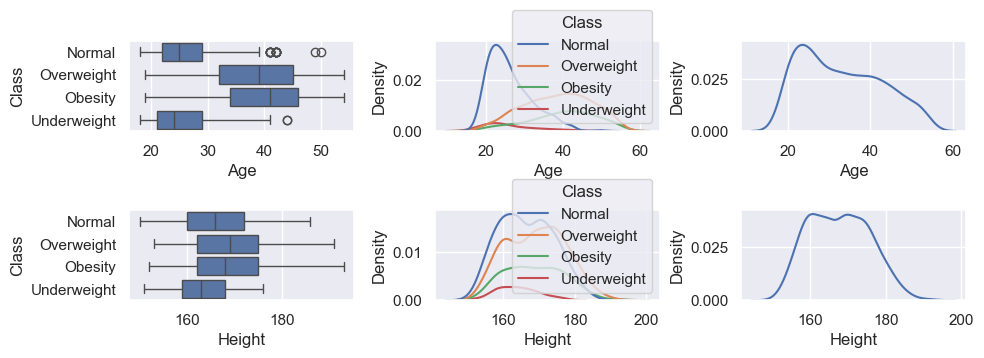

In [139]:
Numerical_columns =['Age','Height']
fig = plt.figure(figsize = (10,20))
i=0
for col in Numerical_columns:
    if col !='Status':
        plt.subplot(12, 3, i+1)
        i += 1
        sns.boxplot(df, x=col, y='Class')
        plt.subplot(12, 3, i+1)
        i += 1
        sns.kdeplot(df, x=col, hue='Class')
        plt.subplot(12, 3, i+1)
        i += 1
        sns.kdeplot(df, x=col)
fig.tight_layout()

In [140]:
categorical_columns = df.select_dtypes(include=['object']).columns
print('The descriptive statistics of categorical features are:')
df.describe(include=['O']).T

The descriptive statistics of categorical features are:


,count,unique,top,freq
Sex,1610,2,Female,898
Overweight_Obese_Family,1610,2,No,1344
Consumption_of_Fast_Food,1610,2,No,1174
Frequency_of_Consuming_Vegetables,1610,3,Sometimes,708
Number_of_Main_Meals_Daily,1610,3,3,928
Food_Intake_Between_Meals,1610,4,Sometimes,564
Smoking,1610,2,No,1118
Liquid_Intake_Daily,1610,3,In excess of 2 liters,631
Calculation_of_Calorie_Intake,1610,2,No,1324
Physical_Excercise,1610,5,6+ days,386


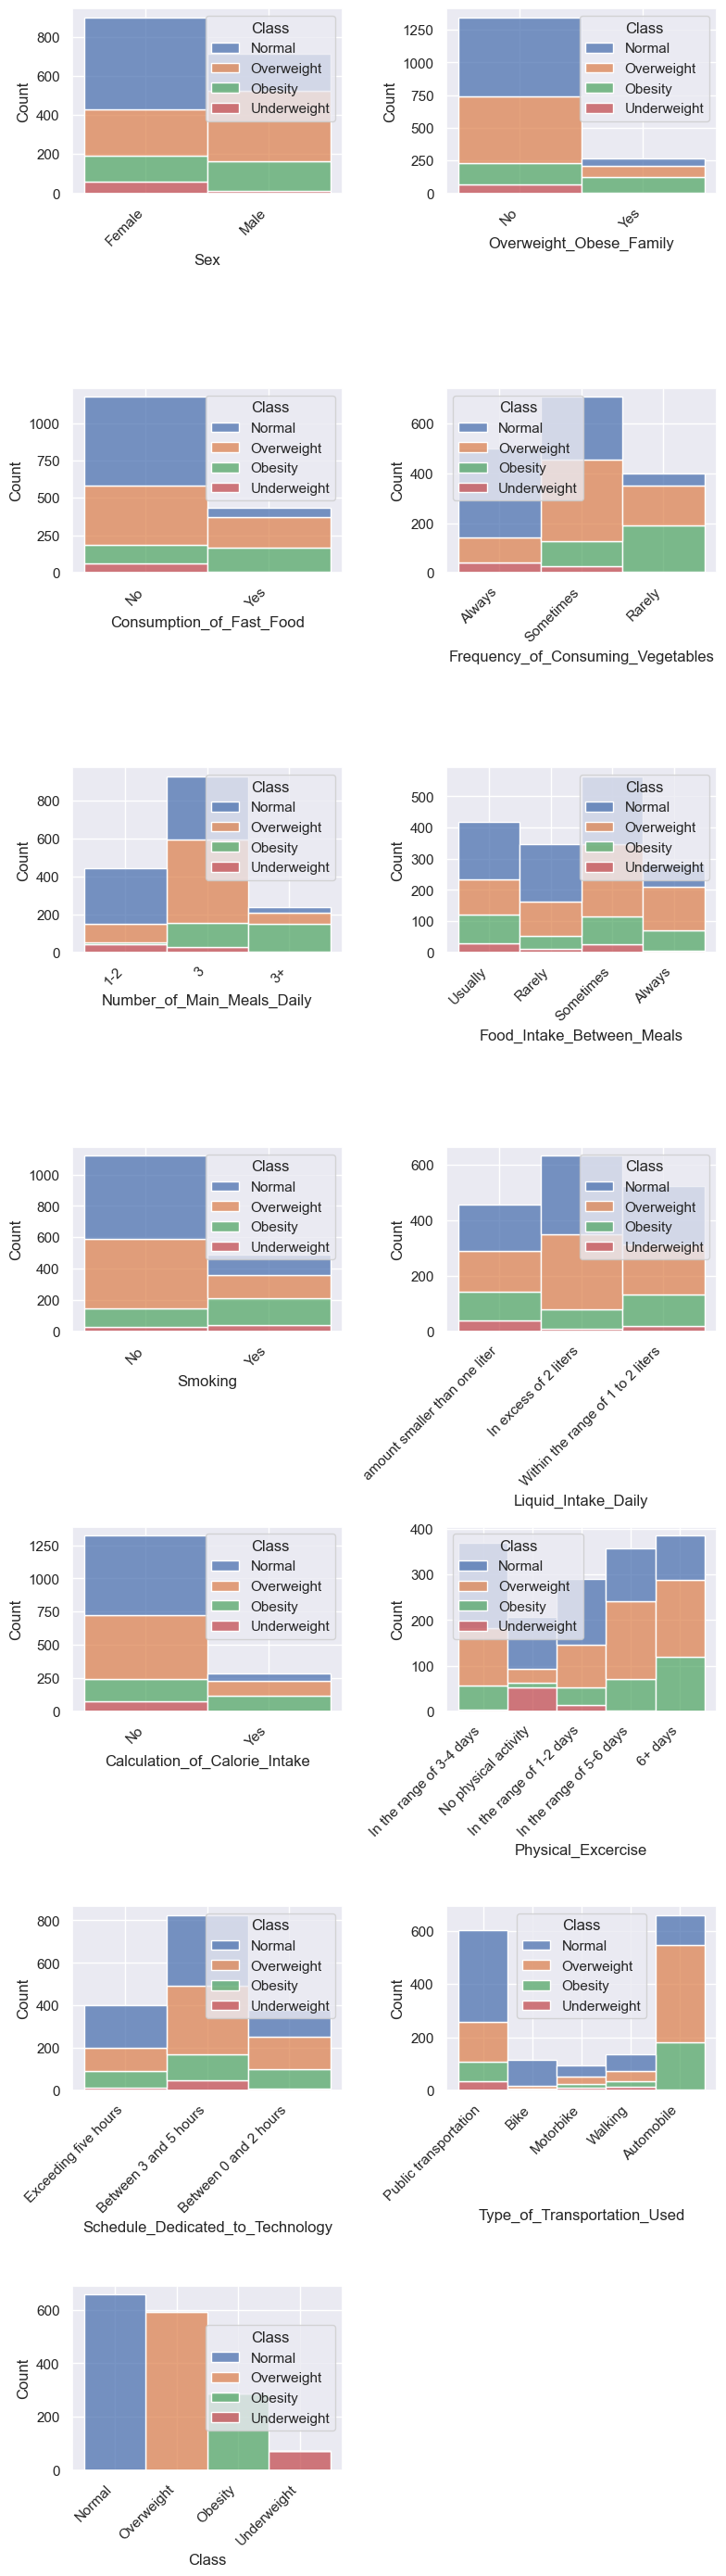

In [141]:
categorical_columns = df.select_dtypes(include=['object']).columns
num_columns = len(categorical_columns)
rows = (num_columns + 1) // 2  
fig = plt.figure(figsize = (8, rows * 4))
for i, col in enumerate(categorical_columns):
    plt.subplot(rows, 2, i+1)
    sns.histplot(data=df, x=col, hue='Class', multiple='stack')
    plt.xticks(rotation=45, ha='right')  
fig.tight_layout()
plt.show()


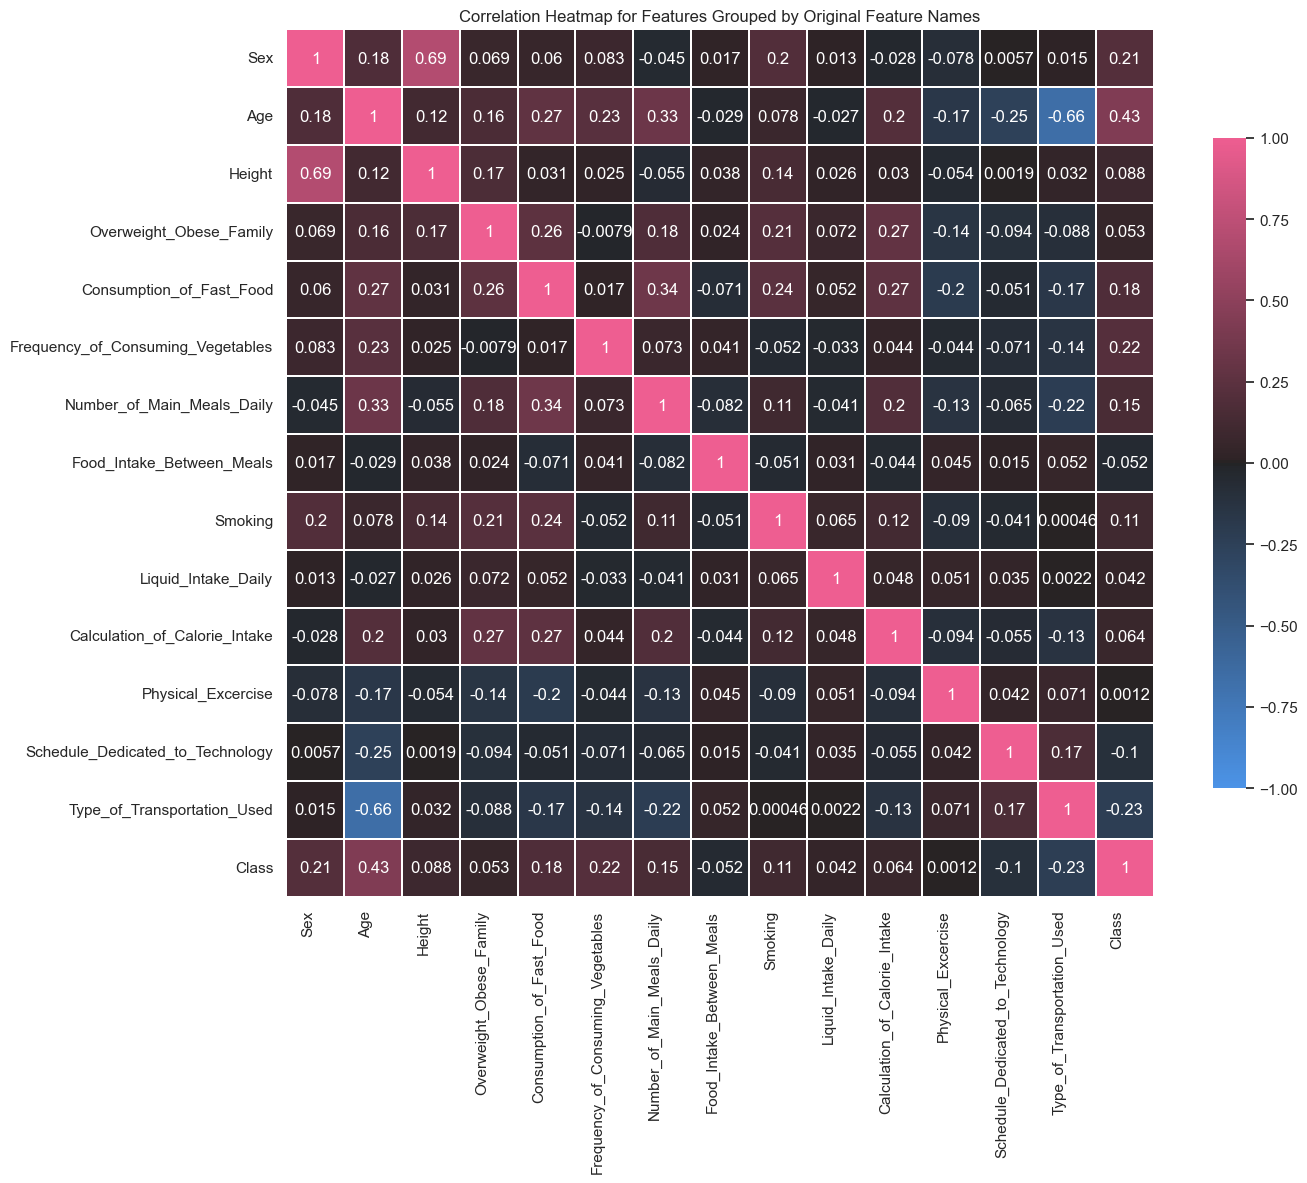

In [142]:
categorical_columns = df.select_dtypes(include=['object']).columns
heatmap_df=copy.deepcopy(df)
label_encoders = {}
for col in categorical_columns:
    label_encoder = LabelEncoder()
    heatmap_df[col] = label_encoder.fit_transform(heatmap_df[col])
    label_encoders[col] = label_encoder
corr = heatmap_df.corr(method="pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.2, annot=True, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap for Features Grouped by Original Feature Names')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<p>The correlation matrix reveals several key relationships between demographic and lifestyle factors. Height and sex show a strong positive correlation, indicating that height is closely related to gender. Age also positively correlates with class, suggesting that as people age, they tend to belong to a different class. Additionally, fast food consumption is moderately linked with the number of main meals daily, meaning that individuals who consume more fast food tend to have more meals per day. 

On the other hand, there are notable negative correlations, particularly between schedule dedicated to technology and age, implying that younger individuals spend more time on technology than older ones. Physical exercise is negatively correlated with both smoking and fast food consumption, indicating that people who smoke or eat more fast food are less likely to engage in physical activity. Overall, the matrix highlights significant patterns between lifestyle behaviors and demographic characteristics such as age, gender, and class</p>

<h2>1.3 Data Preprocessing</h2>
<p>The dataset will be prepared for analysis by executing the following key steps:</p>

<h4>1.3.1 Duplication check:</h4>
<p>There is no missing data, hence there is no necessity to utilize any method for imputing missing data.</p>

In [143]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


<h4>1.3.2 Data Cleaning:</h4>
<p>After reviewing the dataset, we have determined that all features are critical to the analysis. Therefore, no features will be removed from the dataset at this stage, as each provides valuable information for our model.</p>

In [144]:
missing_values_count = df.isnull().sum()
print("Number of missing values in each feature :\n")
print(missing_values_count)

Number of missing values in each feature :

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64


<h4>1.3.3 Balance Check:</h4>
<p>We performed a balance check to ensure that the dataset is representative of the underlying population. As shown in the figure, the data distribution reveals a significant imbalance.</p>

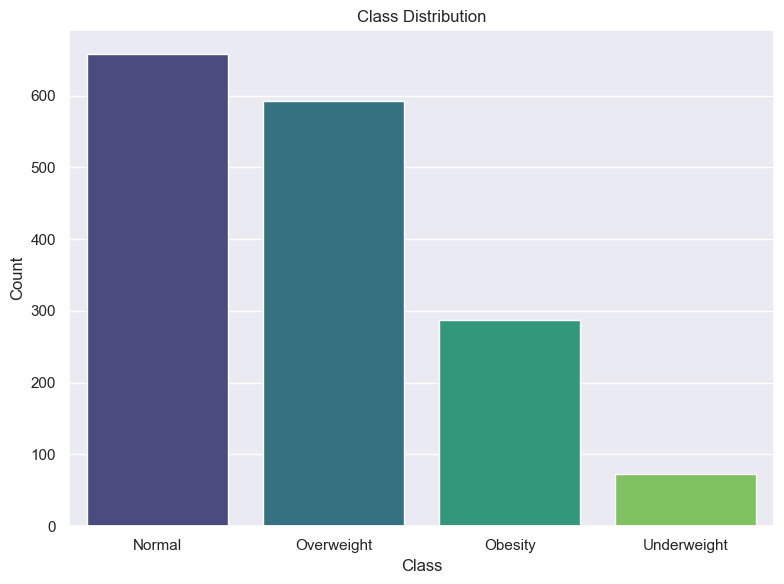

In [145]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<h4>1.3.4 Normalization:</h4>
<p>To improve model performance and ensure equal treatment of all features, it is essential to normalize numerical attributes. In this report, we use the MinMaxScaler to scale features to a common range (0 to 1), which enhances convergence and accuracy in the model.</p>

In [146]:
numerical_columns = df.select_dtypes(include=['float64']).columns.tolist()
normalized_values = df[numerical_columns].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(normalized_values)
values_to_normalize = scaler.transform(normalized_values)
df_normalized = copy.deepcopy(df)
df_normalized[numerical_columns] = values_to_normalize
df = df_normalized
df.head()


,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,Female,0.0,0.116279,No,No,Always,1-2,Usually,No,amount smaller than one liter,No,In the range of 3-4 days,Exceeding five hours,Public transportation,Normal
1,Female,0.0,0.186047,No,No,Always,1-2,Rarely,No,amount smaller than one liter,No,No physical activity,Exceeding five hours,Bike,Normal
2,Female,0.0,0.209302,No,No,Sometimes,1-2,Usually,No,In excess of 2 liters,No,In the range of 1-2 days,Exceeding five hours,Public transportation,Normal
3,Female,0.0,0.279070,No,No,Sometimes,3,Sometimes,No,Within the range of 1 to 2 liters,No,No physical activity,Exceeding five hours,Public transportation,Normal
4,Female,0.0,0.348837,No,Yes,Sometimes,1-2,Usually,No,amount smaller than one liter,No,In the range of 3-4 days,Exceeding five hours,Motorbike,Normal


<h4>1.3.5 Data encoding:</h4>
<p>Label encoding and one-hot encoding are techniques used to transform categorical data into numerical formats, allowing machine learning algorithms to handle and interpret them as numeric inputs.There is no missing data, hence there is no necessity to utilize any method for imputing missing data.</p>

In [708]:
tmp_df = copy.deepcopy(df)
y = tmp_df.loc[:, 'Class'].to_numpy()
y_DF = tmp_df.loc[:, 'Class']
X = tmp_df.drop(["Class"], axis=1) 

tmp_df = pd.get_dummies(X.Sex, prefix='Sex')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Overweight_Obese_Family, prefix='Overweight_Obese_Family')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Consumption_of_Fast_Food, prefix='Consumption_of_Fast_Food')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Frequency_of_Consuming_Vegetables, prefix='Frequency_of_Consuming_Vegetables')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Number_of_Main_Meals_Daily, prefix='Number_of_Main_Meals_Daily')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Food_Intake_Between_Meals, prefix='Food_Intake_Between_Meals')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Smoking, prefix='Smoking')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Liquid_Intake_Daily, prefix='Liquid_Intake_Daily')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Calculation_of_Calorie_Intake, prefix='Calculation_of_Calorie_Intake')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Physical_Excercise, prefix='Physical_Excercise')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Schedule_Dedicated_to_Technology, prefix='Schedule_Dedicated_to_Technology')
X = pd.concat([X, tmp_df], axis=1)

tmp_df = pd.get_dummies(X.Type_of_Transportation_Used, prefix='Type_of_Transportation_Used')
X = pd.concat([X, tmp_df], axis=1)


label_encoder = LabelEncoder()
X['Class_Encoded'] = label_encoder.fit_transform(y_DF)

# Remove original columns after one hot encoding
columns_to_drop = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food', 
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 
    'Food_Intake_Between_Meals', 'Smoking', 'Liquid_Intake_Daily', 
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 
    'Schedule_Dedicated_to_Technology', 'Type_of_Transportation_Used'
]

X.drop(columns=columns_to_drop, inplace=True)




X.head()




<h4>1.3.6. Final dataset:</h4>


In [148]:
X_float = X.astype(float)  
X_float.head()

,Age,Height,Sex_Female,Sex_Male,Overweight_Obese_Family_No,Overweight_Obese_Family_Yes,Consumption_of_Fast_Food_No,Consumption_of_Fast_Food_Yes,Frequency_of_Consuming_Vegetables_Always,Frequency_of_Consuming_Vegetables_Rarely,...,Physical_Excercise_No physical activity,Schedule_Dedicated_to_Technology_Between 0 and 2 hours,Schedule_Dedicated_to_Technology_Between 3 and 5 hours,Schedule_Dedicated_to_Technology_Exceeding five hours,Type_of_Transportation_Used_Automobile,Type_of_Transportation_Used_Bike,Type_of_Transportation_Used_Motorbike,Type_of_Transportation_Used_Public transportation,Type_of_Transportation_Used_Walking,Class_Encoded
0,0.0,0.116279,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.186047,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.209302,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.279070,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.348837,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


<p><b>All features have been converted to the floating-point data type, and key statistical metrics, including the mean and standard deviation, are presented.</b></p>


In [149]:
X_float.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1610.0,0.419876,0.273197,0.0,0.194444,0.388889,0.638889,1.0
Height,1610.0,0.412596,0.185578,0.0,0.255814,0.418605,0.558140,1.0
Sex_Female,1610.0,0.557764,0.496806,0.0,0.000000,1.000000,1.000000,1.0
Sex_Male,1610.0,0.442236,0.496806,0.0,0.000000,0.000000,1.000000,1.0
Overweight_Obese_Family_No,1610.0,0.834783,0.371492,0.0,1.000000,1.000000,1.000000,1.0
Overweight_Obese_Family_Yes,1610.0,0.165217,0.371492,0.0,0.000000,0.000000,0.000000,1.0
Consumption_of_Fast_Food_No,1610.0,0.729193,0.444515,0.0,0.000000,1.000000,1.000000,1.0
Consumption_of_Fast_Food_Yes,1610.0,0.270807,0.444515,0.0,0.000000,0.000000,1.000000,1.0
Frequency_of_Consuming_Vegetables_Always,1610.0,0.311801,0.463373,0.0,0.000000,0.000000,1.000000,1.0
Frequency_of_Consuming_Vegetables_Rarely,1610.0,0.248447,0.432247,0.0,0.000000,0.000000,0.000000,1.0


<p><b>The preprocessing techniques have enhanced the clarity of the correlations observed between the features, as illustrated in the heatmap below.</b></p>


<Axes: >

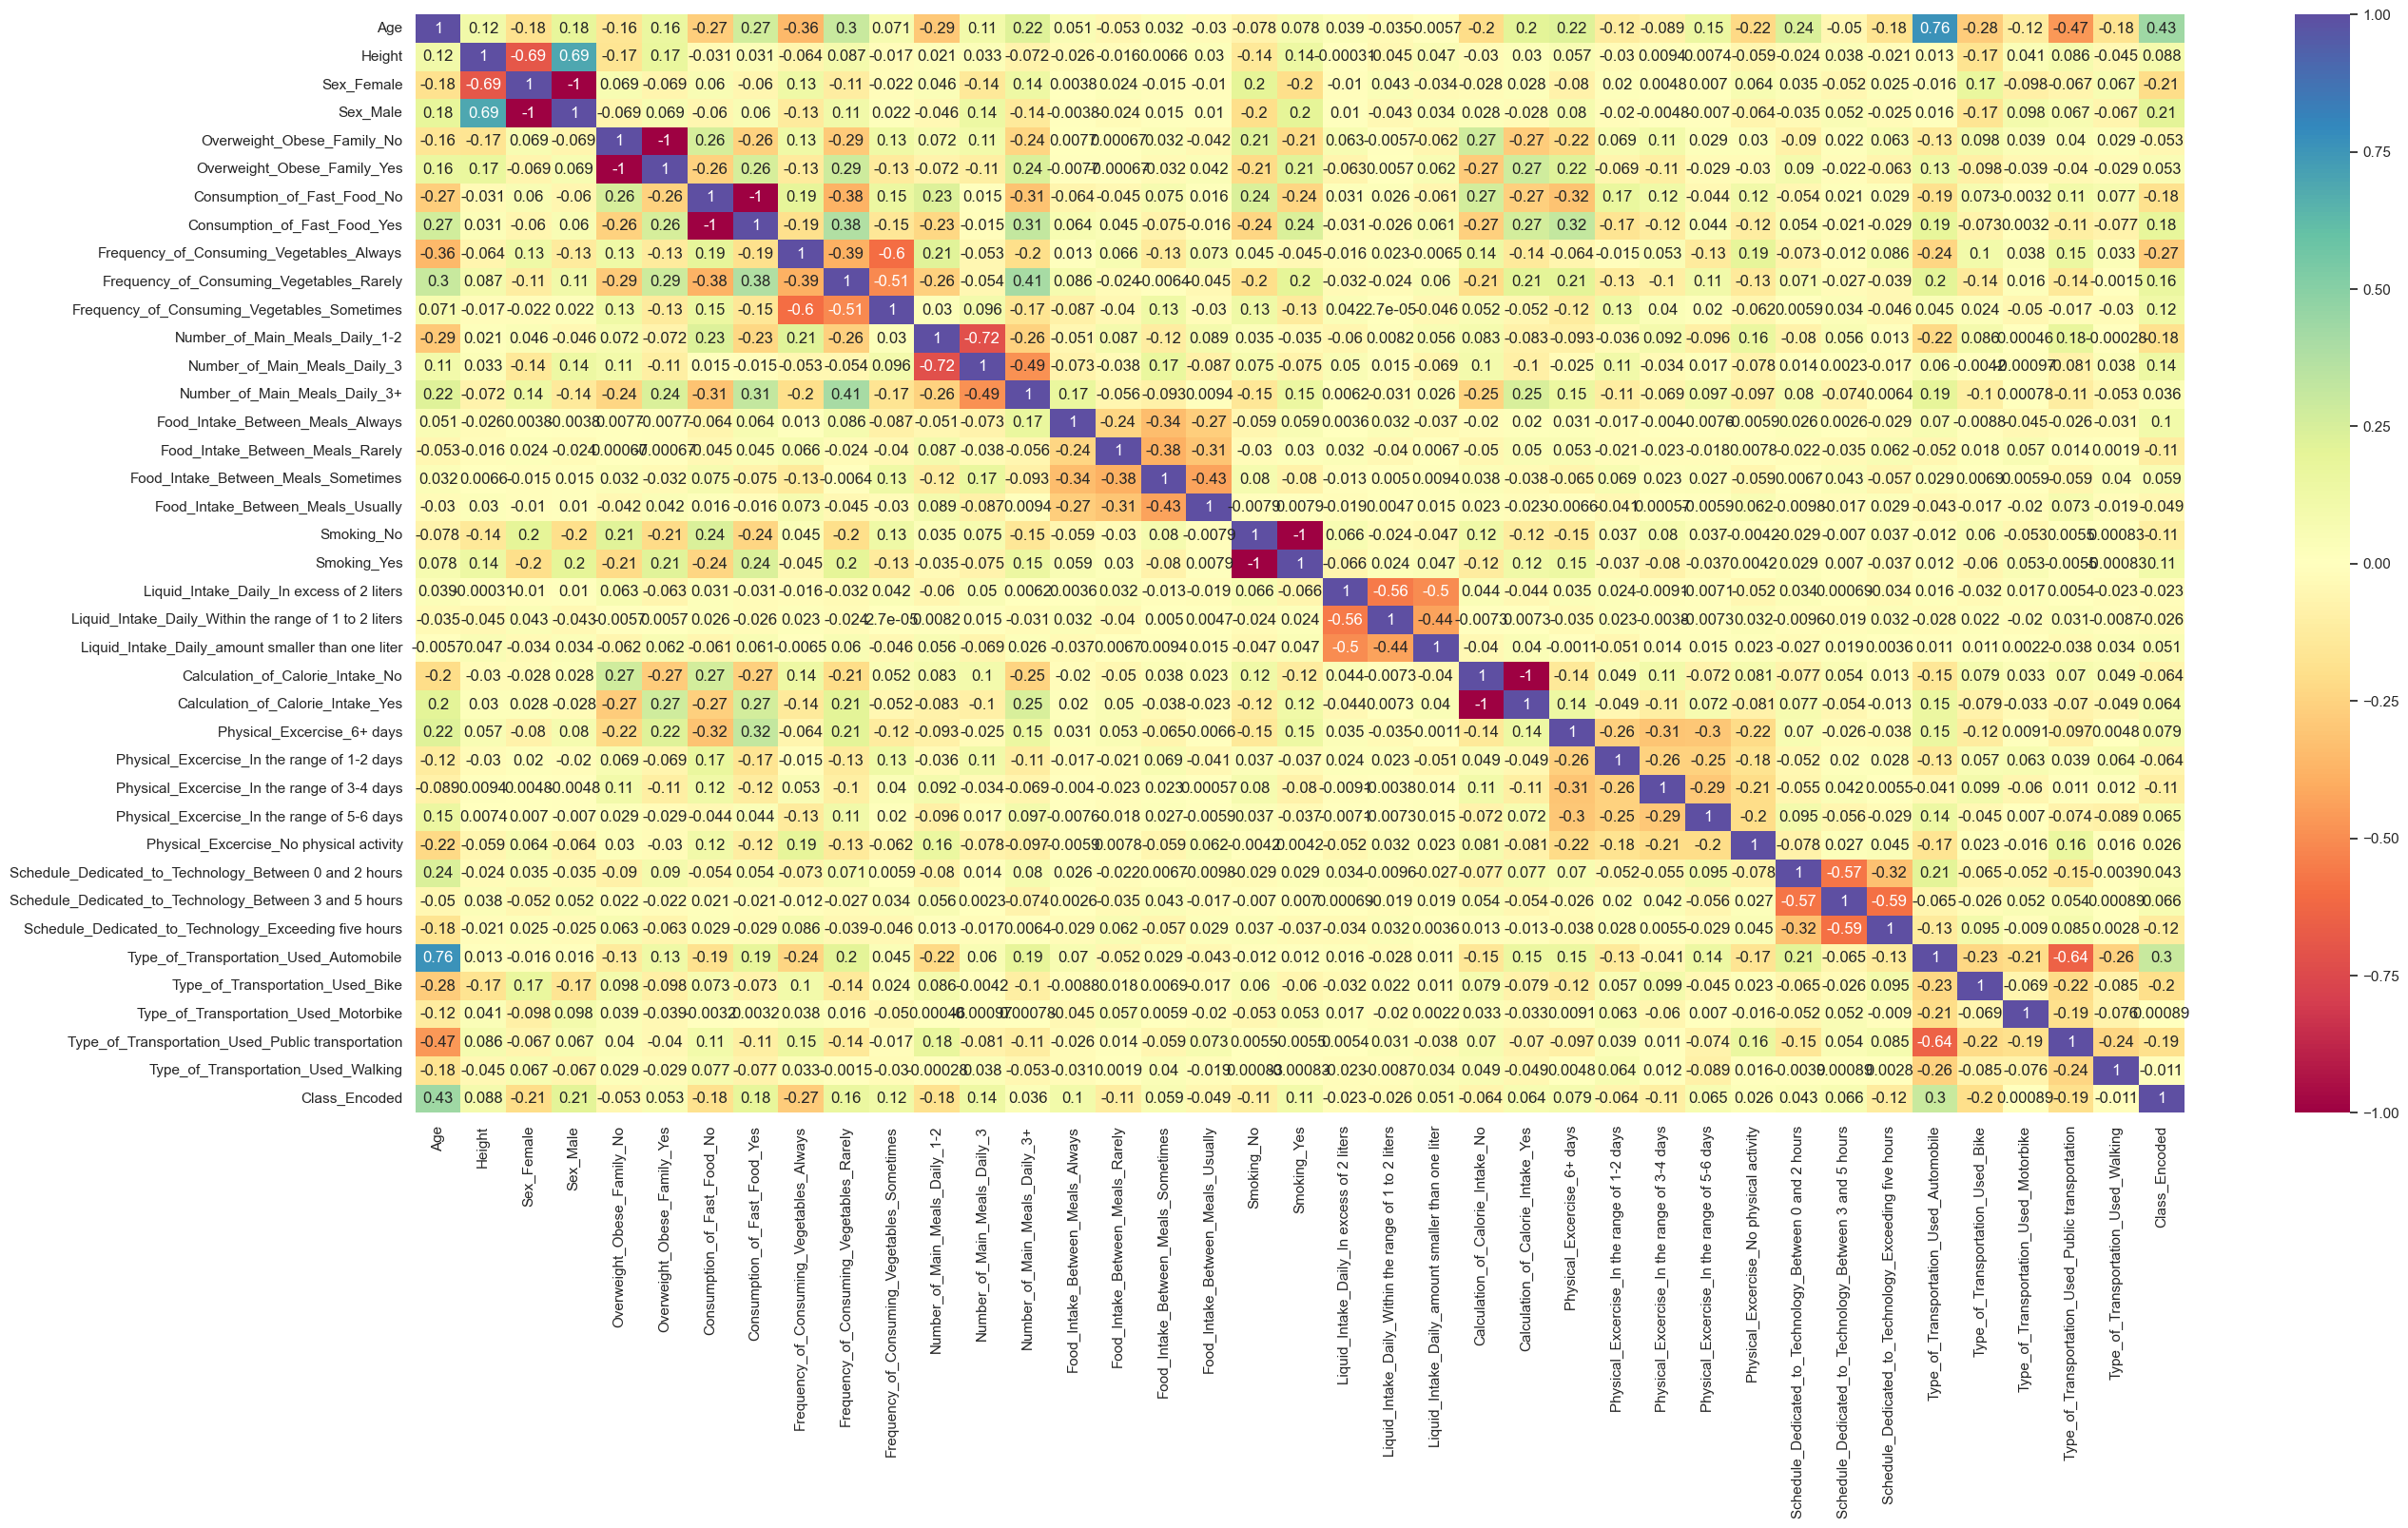

In [150]:
plt.figure(figsize=(30,15))
sns.heatmap(X_float.corr(),annot=True, cmap='Spectral')

<h4>1.4 Training and Testing Split</h4>
<p>This analysis evaluated the performance of a logistic regression model using the ShuffleSplit method under various training and testing data splits. The model, designed to handle potential non-linearities and avoid overfitting, was assessed based on accuracy and false negatives across test sizes of 10%, 20%, 30%, and 40%. Each split was evaluated over 10 iterations for robustness. The results showed stable accuracy and false negative rates across all splits, with performance improving slightly as the test size decreased, reaching its peak at a 10% test size.</p>

In [151]:
lr_sk = SKLogisticRegression(solver='lbfgs', n_jobs=2, multi_class='ovr', 
                             C=1/0.001, penalty='l2', max_iter=100)
X_array = np.array(X_float)  
cv_object_1 = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
cv_object_2 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
cv_object_3 = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
cv_object_4 = ShuffleSplit(n_splits=10, test_size=0.4, random_state=42)
accuracy_1, fn_1 = [], []
accuracy_2, fn_2 = [], []
accuracy_3, fn_3 = [], []
accuracy_4, fn_4 = [], []
def evaluate_model(cv_object, accuracy_list, fn_list):
    for train_indices, test_indices in cv_object.split(X_array, y):
        lr_sk.fit(X_array[train_indices], y[train_indices])
        y_hat = lr_sk.predict(X_array[test_indices])
        accuracy_list.append(accuracy_score(y[test_indices], y_hat))
        cm = confusion_matrix(y[test_indices], y_hat)
        fn_list.append(cm[1][0])
evaluate_model(cv_object_1, accuracy_1, fn_1)
evaluate_model(cv_object_2, accuracy_2, fn_2)
evaluate_model(cv_object_3, accuracy_3, fn_3)
evaluate_model(cv_object_4, accuracy_4, fn_4)
print("Average accuracy for 10% test size is", np.mean(accuracy_1), "with total false negatives:", sum(fn_1))
print("Average accuracy for 20% test size is", np.mean(accuracy_2), "with total false negatives:", sum(fn_2))
print("Average accuracy for 30% test size is", np.mean(accuracy_3), "with total false negatives:", sum(fn_3))
print("Average accuracy for 40% test size is", np.mean(accuracy_4), "with total false negatives:", sum(fn_4))


Average accuracy for 10% test size is 0.967080745341615 with total false negatives: 2
Average accuracy for 20% test size is 0.9701863354037267 with total false negatives: 4
Average accuracy for 30% test size is 0.9679089026915115 with total false negatives: 5
Average accuracy for 40% test size is 0.9664596273291925 with total false negatives: 9


<p>The logistic regression model maintains consistent accuracy across various data splits, showing particular strength in the 90/10 and 80/20 splits, though results fluctuate due to the Shuffle Split method where numbers vary with each iteration. Initially, data imbalance was not addressed, highlighting the need for further investigation with more comprehensive strategies. Additionally, we are focusing on two key metrics: accuracy and false negatives, to ensure a more robust evaluation of the model's performance.</p>

The smallest class in the data for the 10%(test size) split is 7.


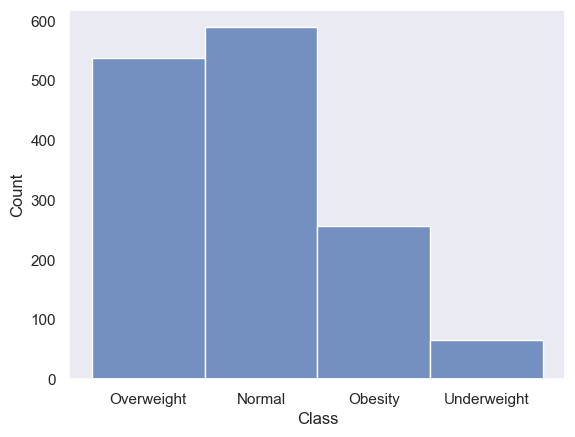

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y_DF,test_size=0.1)
test_plot = pd.concat([y_train, y_test], axis=1)
sns.histplot(y_train)
print('The smallest class in the data for the 10%(test size) split is {}.'.format(min([y_test[y_test == val].count() for val in y_test.unique()])))
plt.grid()

The smallest class in the data for the 20%(test size) split is 18.


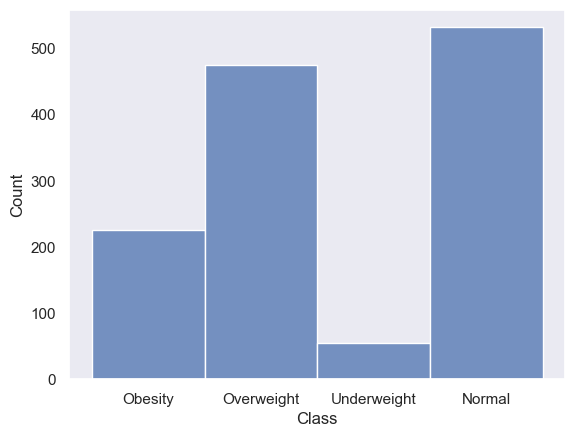

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y_DF,test_size=0.2)
test_plot = pd.concat([y_train, y_test], axis=1)
sns.histplot(y_train)
print('The smallest class in the data for the 20%(test size) split is {}.'.format(min([y_test[y_test == val].count() for val in y_test.unique()])))
plt.grid()

<p>In our analysis, the logistic regression model exhibited consistent accuracy and false negative values across various data splits, showing particularly strong performance with the 90/10 and 80/20 splits. Despite these positive outcomes, a deeper examination of the dataset revealed significant class imbalances, with the smallest class sizes being 14 in the 20% test split and 3 in the 10% test split. This discrepancy highlights a critical need for implementing strategies that ensure a more balanced distribution of class samples across training and testing datasets. By adjusting our approach to achieve more balanced split scenarios, such as using stratified sampling, we aim to mitigate the effects of data imbalance. This will not only enhance the model's accuracy but also improve its generalizability across diverse data representations, ensuring that findings are robust and reflective of the entire dataset's characteristics.</p>

In [154]:
cv_object = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
class_counts = []
for train_indices, test_indices in cv_object.split(X_array, y):
    class_distribution = Counter(y[test_indices])
    class_counts.append(class_distribution)
for i, counts in enumerate(class_counts, start=1):
    print(f"Fold {i} class counts: {counts}")

Fold 1 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 29, 'Underweight': 7})
Fold 2 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 29, 'Underweight': 7})
Fold 3 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 29, 'Underweight': 7})
Fold 4 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 29, 'Underweight': 7})
Fold 5 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 29, 'Underweight': 7})
Fold 6 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 29, 'Underweight': 7})
Fold 7 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 29, 'Underweight': 7})
Fold 8 class counts: Counter({'Normal': 66, 'Overweight': 59, 'Obesity': 28, 'Underweight': 8})
Fold 9 class counts: Counter({'Normal': 65, 'Overweight': 60, 'Obesity': 28, 'Underweight': 8})
Fold 10 class counts: Counter({'Normal': 65, 'Overweight': 60, 'Obesity': 28, 'Underweight': 8})


In [155]:
cv_object = KFold(n_splits=10, shuffle=True, random_state=42)
class_counts = []
for train_indices, test_indices in cv_object.split(X_array):
    class_distribution = Counter(y[test_indices])
    class_counts.append(class_distribution)
for i, counts in enumerate(class_counts, start=1):
    print(f"Fold {i} class counts: {counts}")

Fold 1 class counts: Counter({'Normal': 65, 'Overweight': 59, 'Obesity': 29, 'Underweight': 8})
Fold 2 class counts: Counter({'Overweight': 72, 'Normal': 60, 'Obesity': 24, 'Underweight': 5})
Fold 3 class counts: Counter({'Normal': 67, 'Overweight': 62, 'Obesity': 25, 'Underweight': 7})
Fold 4 class counts: Counter({'Overweight': 62, 'Normal': 59, 'Obesity': 34, 'Underweight': 6})
Fold 5 class counts: Counter({'Normal': 69, 'Overweight': 61, 'Obesity': 26, 'Underweight': 5})
Fold 6 class counts: Counter({'Normal': 76, 'Overweight': 53, 'Obesity': 23, 'Underweight': 9})
Fold 7 class counts: Counter({'Normal': 71, 'Overweight': 53, 'Obesity': 21, 'Underweight': 16})
Fold 8 class counts: Counter({'Overweight': 63, 'Normal': 60, 'Obesity': 34, 'Underweight': 4})
Fold 9 class counts: Counter({'Normal': 58, 'Overweight': 58, 'Obesity': 37, 'Underweight': 8})
Fold 10 class counts: Counter({'Normal': 73, 'Overweight': 49, 'Obesity': 34, 'Underweight': 5})


<h4>- Why We Choose Stratified Sampling Over Normal Sampling: </h4>





StratifiedKFold is preferable to KFold for classification tasks, especially with imbalanced datasets like ours. With StratifiedKFold, each fold maintains a consistent class distribution, resulting in near-identical counts across folds (e.g., "Normal" has 66 samples, "Overweight" 59, "Obesity" 29, and "Underweight" 7 in most folds). This consistency ensures that the model is evaluated fairly across all classes in each fold, leading to reliable performance metrics. In contrast, KFold lacks this consistency, with class counts varying significantly between folds (e.g., Fold 2 has 72 "Overweight" and 24 "Obesity" samples, while Fold 6 has 76 "Normal" and only 23 "Obesity" samples). Such variation can cause biased performance estimates, making StratifiedKFold a better choice for stable and accurate model assessment across classes.

In [156]:
lr_sk = SKLogisticRegression(solver='lbfgs', n_jobs=2, multi_class='ovr', 
                             C=1/0.001, penalty='l2', max_iter=100)
X_array = np.array(X_float)
skfold_1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  
skfold_2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  
skfold_3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  
skfold_4 = StratifiedKFold(n_splits=2, shuffle=True, random_state=42) 
accuracy_1, fn_1 = [], []
accuracy_2, fn_2 = [], []
accuracy_3, fn_3 = [], []
accuracy_4, fn_4 = [], []
def evaluate_model(skfold, accuracy_list, fn_list):
    print(f"\nAccuracies for {skfold.get_n_splits()}-fold split:")
    for fold, (train_indices, test_indices) in enumerate(skfold.split(X_array, y)):
        lr_sk.fit(X_array[train_indices], y[train_indices])
        y_hat = lr_sk.predict(X_array[test_indices])
        accuracy = mt.accuracy_score(y[test_indices], y_hat)
        accuracy_list.append(accuracy)
        cm = mt.confusion_matrix(y[test_indices], y_hat)
        fn = cm[1][0]  # False negatives are the element at position (1, 0) in the confusion matrix
        fn_list.append(fn)
        print(f"Fold {fold+1} accuracy: {accuracy}, false negatives: {fn}")
evaluate_model(skfold_1, accuracy_1, fn_1)
evaluate_model(skfold_2, accuracy_2, fn_2)
evaluate_model(skfold_3, accuracy_3, fn_3)
evaluate_model(skfold_4, accuracy_4, fn_4)
print("\nMaximum accuracy for 10-fold (10% test data, 90% training data) split is", np.max(accuracy_1), "with total false negatives:", sum(fn_1))
print("Maximum accuracy for 5-fold (20% test data, 80% training data) split is", np.max(accuracy_2), "with total false negatives:", sum(fn_2))
print("Maximum accuracy for 3-fold (33.33% test data, 66.67% training data) split is", np.max(accuracy_3), "with total false negatives:", sum(fn_3))
print("Maximum accuracy for 2-fold (50% test data, 50% training data) split is", np.max(accuracy_4), "with total false negatives:", sum(fn_4))



Accuracies for 10-fold split:
Fold 1 accuracy: 0.968944099378882, false negatives: 0
Fold 2 accuracy: 0.9565217391304348, false negatives: 1
Fold 3 accuracy: 0.9751552795031055, false negatives: 0
Fold 4 accuracy: 0.9813664596273292, false negatives: 0
Fold 5 accuracy: 0.9254658385093167, false negatives: 0
Fold 6 accuracy: 0.9565217391304348, false negatives: 0
Fold 7 accuracy: 0.9751552795031055, false negatives: 0
Fold 8 accuracy: 0.9875776397515528, false negatives: 0
Fold 9 accuracy: 0.9627329192546584, false negatives: 0
Fold 10 accuracy: 0.9751552795031055, false negatives: 0

Accuracies for 5-fold split:
Fold 1 accuracy: 0.9627329192546584, false negatives: 1
Fold 2 accuracy: 0.9813664596273292, false negatives: 0
Fold 3 accuracy: 0.937888198757764, false negatives: 0
Fold 4 accuracy: 0.9813664596273292, false negatives: 0
Fold 5 accuracy: 0.9720496894409938, false negatives: 0

Accuracies for 3-fold split:
Fold 1 accuracy: 0.9683426443202979, false negatives: 1
Fold 2 accurac

<p>Based on the results from the cross-validation analysis using different training and testing splits, we have decided to adopt the 90/10 split for our logistic regression model. This decision is underpinned by the split's superior performance metrics, which include the highest maximum accuracy of 98.76% and the lowest total false negatives, totaling only one across ten iterations. This combination of high accuracy and minimal false negatives underscores the 90/10 split as the most effective ratio for balancing model precision and sensitivity, making it optimal for our predictive modeling purposes.</p>

<h1>2. Modeling</h1>

<h4>2.1 Custom One-Versus-All Logistic Regression Model</h4>
<p>In this section, a one-versus-all logistic regression classifier is developed using NumPy and SciPy, following the code provided by prof. larson. The code is structured based on object oriented conventions identical to scikit-learn.</p>

In [366]:
class LogisticRegression:
    def __init__(self,
                eta=0.1,
                threshold=0.5,
                iterations=100,
                C=1.0,
                reg='l2',
                tol=1e-3,
                solver = 'sgd' 
               ):
        self.eta = np.float64(eta)
        self.iters = np.intc(iterations)
        self.tol = np.float64(tol)
        self.C = np.float64(C)
        self.threshold = np.float64(threshold)
        self.solver = solver
        
        if reg not in ['l1', 'l2', 'elastic_net','none']:
            raise ValueError('That is not a valid value for reg.')
        else:
            self.reg = reg
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>threshold) #return the actual prediction

In [367]:
class BinaryLogisticRegression(LogisticRegression):
         
    def _get_gradient(self, X, y):
        
        gradient = None
        if self.solver == 'sa':
            gradient = self._steepest_ascent
        elif self.solver == 'sgd': 
            gradient = self._stochastic_gradient_descent
        elif self.solver == 'hessian':
            gradient = self._hessian
        elif self.solver == 'HessianMSE':
            gradient = self._Hessian_MSE
        return gradient(X,y)
    
    def _steepest_ascent(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += self.C * self._regularize()
        return gradient
    
    def _stochastic_gradient_descent(self,X,y):
        idxs = np.random.choice(len(y))
        ydiff = y[idxs]-self.predict_proba(X[idxs],add_bias=False) # get y difference (now scalar)
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += self.C * self._regularize()
        return gradient   
 

    def _Hessian_MSE(self, X, y):
        ypred = self.predict_proba(X, add_bias=False).ravel() 
        ydiff = y - ypred 
        hessian_diag_elements = (y + y * 2 * ypred - 2 * ypred - 3 * ypred**3) * ypred * (1 - ypred)
        hessian = -2 * X.T @ np.diag(hessian_diag_elements) @ X
        gradient = (-2) * np.sum(X * (ydiff[:, np.newaxis] * ypred[:, np.newaxis] * (1 - ypred[:, np.newaxis])), axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += self.C * self._regularize()
        return pinv(hessian) @ gradient

    
    def _hessian(self, X, y):
        g = self.predict_proba(X,add_bias=False).ravel()
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C
        ydiff = y-g
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) 
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] +=  self.C * self._regularize()
        return pinv(hessian) @ gradient


    @staticmethod
    def _sigmoid(theta):
        return expit(theta)
    def _regularize(self):
        if self.reg == 'l2': return -2 * self.w_[1:]
        elif self.reg == 'l1': return np.sign(self.w_[1:])
        elif self.reg == 'elastic_net': return -2 * self.w_[1:] + np.sign(self.w_[1:])
        elif self.reg == 'none': return 0
    
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 



In [368]:
class MultiClassLogisticRegression:
    def __init__(self,
                eta=0.1,
                threshold=0.5,
                iterations=100,
                C=1.0,
                reg='l2',
                tol=1e-3,
                solver = 'sgd' 
               ):
        self.eta = np.float64(eta)
        self.iters = np.intc(iterations)
        self.tol = np.float64(tol)
        self.C = np.float64(C)
        self.threshold = np.float64(threshold)
        self.solver = solver
        self.classifiers_ = []
        self.reg = reg
        
    
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class
            blr = BinaryLogisticRegression(eta=self.eta,iterations=self.iters, reg=self.reg, C=self.C,solver=self.solver, )
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row    


<h2>2.2 Optimizing Hyperparameters</h2>
<p>The optimization approach often involves using a grid search model, which is available in the Scikit-learn package. However, for this report, we will not use grid search. Instead, we'll focus exclusively on finding the optimal solver and regularization term. Our method will keep the step size and number of iterations constant while varying the regularization term, regularization method, and solver to identify the configuration that yields the highest accuracy. Instead of employing shuffle split, we will use stratified sampling to ensure representative distribution of classes and prioritize minimizing false negatives in our model evaluation.</p>
<h4>2.2.1 Steepest Ascent</h4>

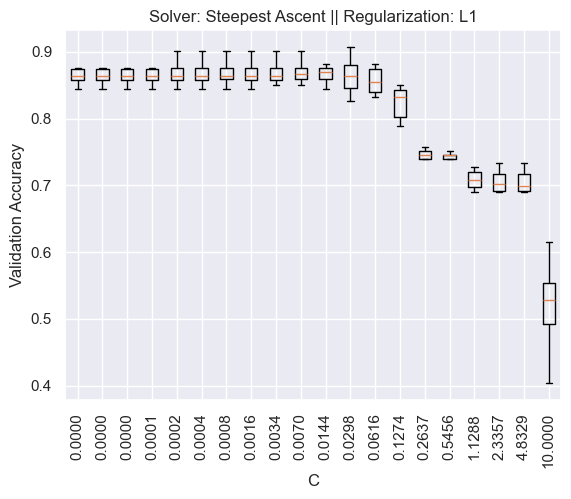

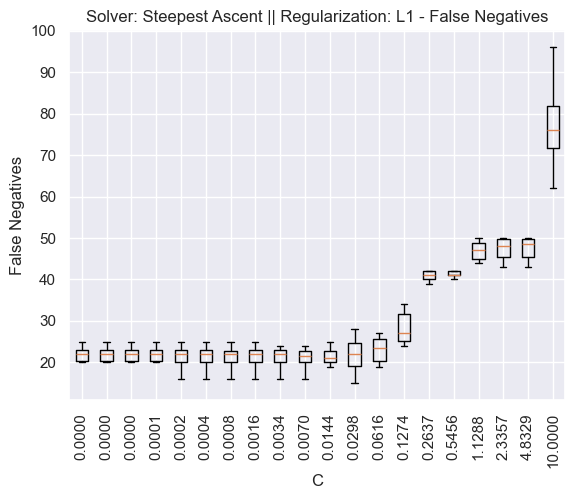

Best C value for L1 regularization (Accuracy): 0.01438449888287663 with an accuracy of 0.870807453416149
Best C value for L1 regularization (False Negatives): 0.01438449888287663 with 20.8 false negatives


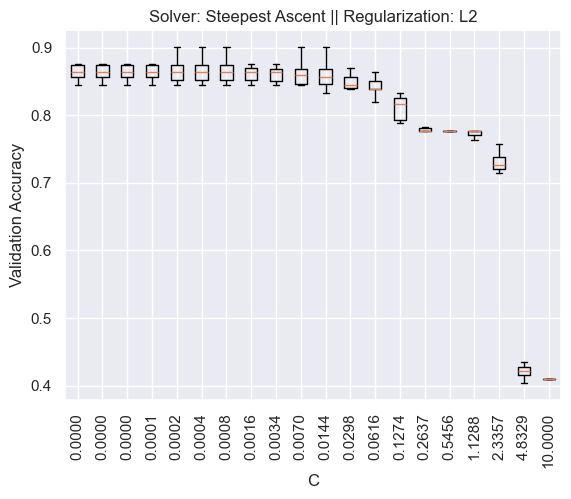

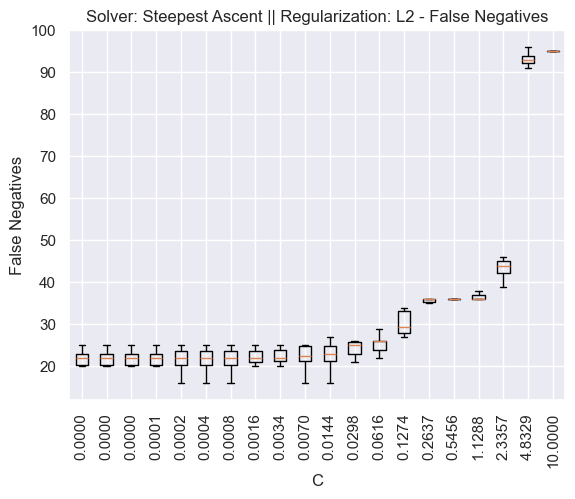

Best C value for L2 regularization (Accuracy): 1e-05 with an accuracy of 0.8652173913043478
Best C value for L2 regularization (False Negatives): 1e-05 with 21.7 false negatives


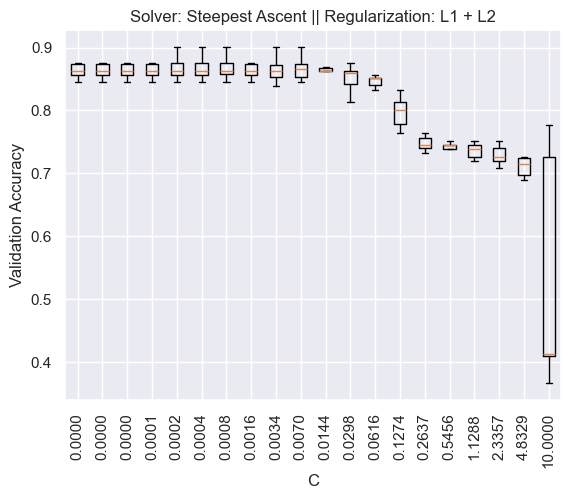

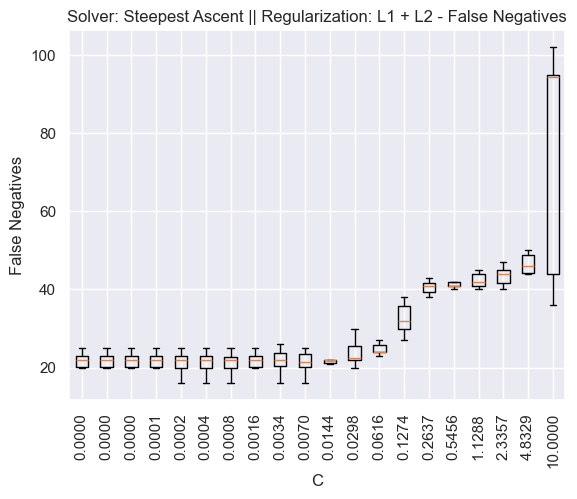

Best C value for L1 + L2 regularization (Accuracy): 0.0007847599703514606 with an accuracy of 0.8664596273291926
Best C value for L1 + L2 regularization (False Negatives): 0.0007847599703514606 with 21.5 false negatives


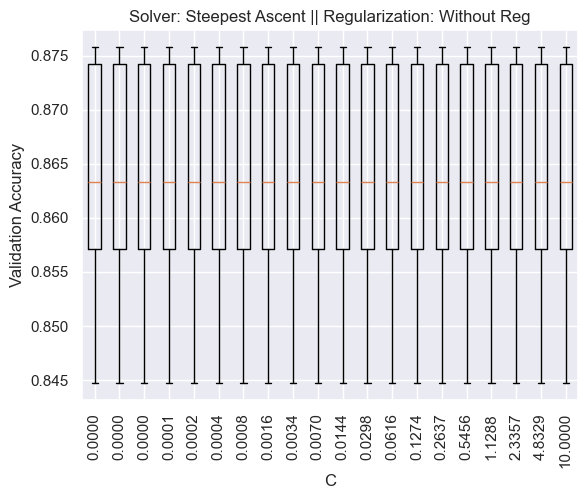

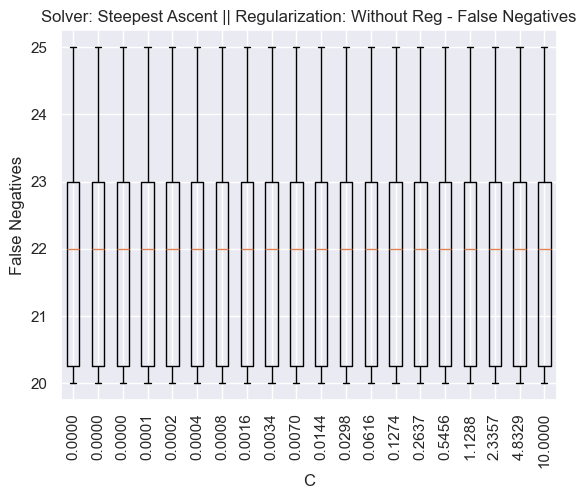

Best C value for Without Reg regularization (Accuracy): 1e-05 with an accuracy of 0.8652173913043478
Best C value for Without Reg regularization (False Negatives): 1e-05 with 21.7 false negatives


In [160]:
regs = ['l1', 'l2', 'elastic_net', 'none']
rregs = {'l1': 'L1', 'l2': 'L2', 'elastic_net': 'L1 + L2', 'none': 'Without Reg'}


cv_object = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for reg1 in regs:
    def lr_explor(cost):
        lr_clf = MultiClassLogisticRegression(eta=0.1, iterations=100, C=float(cost), solver='sa', reg=reg1)        
        acc = []
        false_negatives = []
        for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_array, y)):
            lr_clf.fit(X_array[train_indices], y[train_indices])
            y_hat = lr_clf.predict(X_array[test_indices])
            acc.append(mt.accuracy_score(y[test_indices], y_hat))
            cm = mt.confusion_matrix(y[test_indices], y_hat)
            fn = cm.sum(axis=1) - np.diag(cm)  # Get false negatives per class
            false_negatives.append(fn.sum())  # Aggregate false negatives across all classes
        return np.array(acc), np.array(false_negatives)

    costs = np.logspace(-5, 1, 20)
    accs = []
    fns = []
    for c in costs:
        acc_mean, fn_mean = lr_explor(c)
        accs.append(acc_mean.mean()) 
        fns.append(fn_mean.mean())
    best_acc_index = np.argmax(accs)
    best_fn_index = np.argmin(fns)
    best_c_acc = costs[best_acc_index]
    best_acc = accs[best_acc_index]
    best_c_fn = costs[best_fn_index]
    best_fn = fns[best_fn_index]

    # Plot accuracies using different C values
    plt.boxplot([lr_explor(c)[0] for c in costs], showfliers=False)  # Regenerate accuracy data for boxplot
    plt.xticks(range(1, len(costs) + 1), ['%.4f' % c for c in costs], rotation='vertical')
    plt.title(f'Solver: Steepest Ascent || Regularization: {rregs[reg1]}')
    plt.xlabel('C')
    plt.ylabel('Validation Accuracy')
    plt.show()

    # Plot false negatives using different C values
    plt.boxplot([lr_explor(c)[1] for c in costs], showfliers=False)  # Regenerate FN data for boxplot
    plt.xticks(range(1, len(costs) + 1), ['%.4f' % c for c in costs], rotation='vertical')
    plt.title(f'Solver: Steepest Ascent || Regularization: {rregs[reg1]} - False Negatives')
    plt.xlabel('C')
    plt.ylabel('False Negatives')
    plt.show()

    print(f"Best C value for {rregs[reg1]} regularization (Accuracy): {best_c_acc} with an accuracy of {best_acc}")
    print(f"Best C value for {rregs[reg1]} regularization (False Negatives): {best_c_fn} with {best_fn} false negatives")


<h4>2.2.2 Stochastic Gradient Descent</h4>

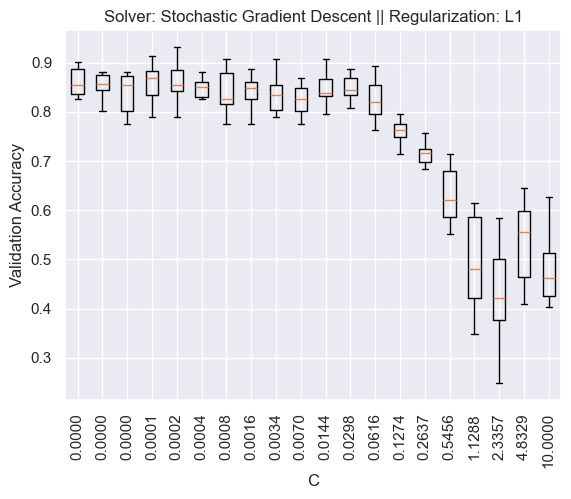

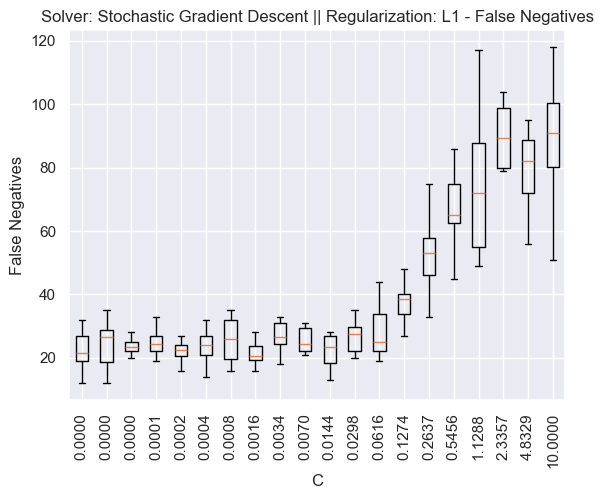

Best C value for L1 regularization (Accuracy): 0.001623776739188721 with an accuracy of 0.8652173913043478
Best C value for L1 regularization (False Negatives): 0.001623776739188721 with 21.7 false negatives


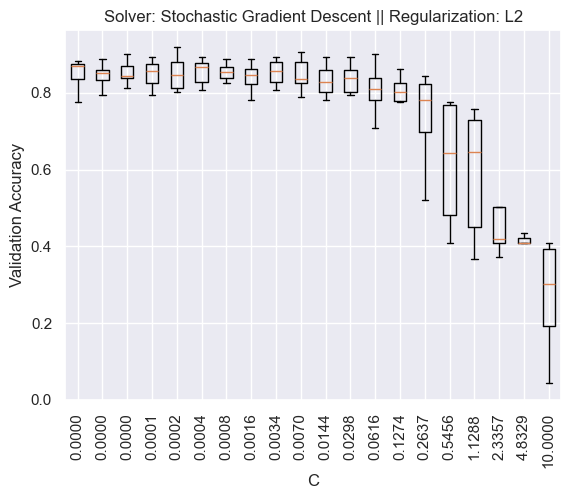

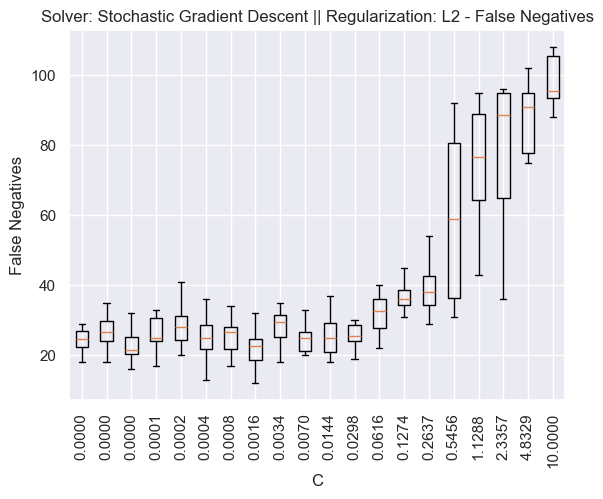

Best C value for L2 regularization (Accuracy): 2.06913808111479e-05 with an accuracy of 0.8652173913043478
Best C value for L2 regularization (False Negatives): 2.06913808111479e-05 with 21.7 false negatives


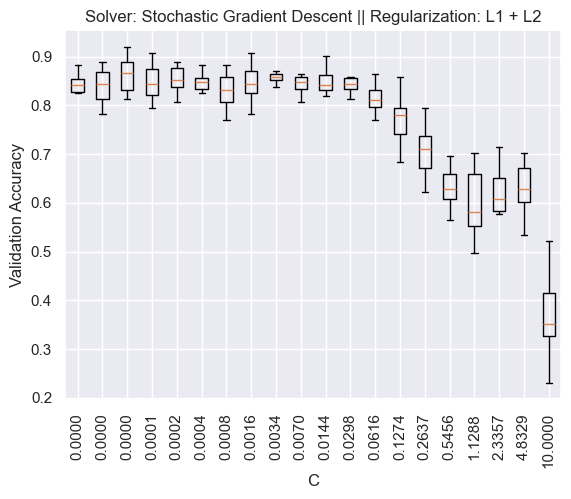

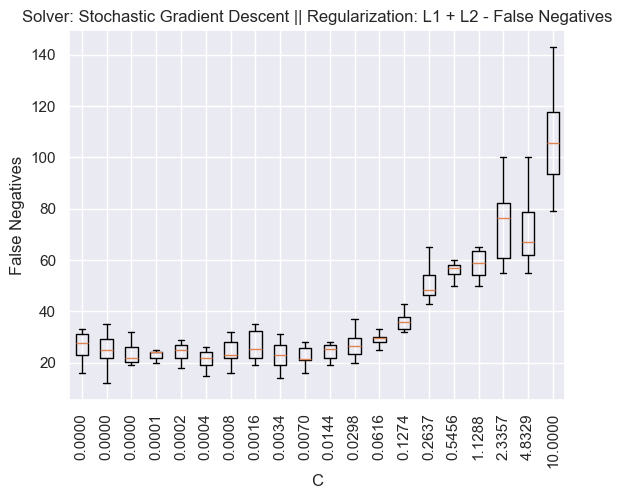

Best C value for L1 + L2 regularization (Accuracy): 0.0069519279617756054 with an accuracy of 0.8627329192546584
Best C value for L1 + L2 regularization (False Negatives): 0.0069519279617756054 with 22.1 false negatives


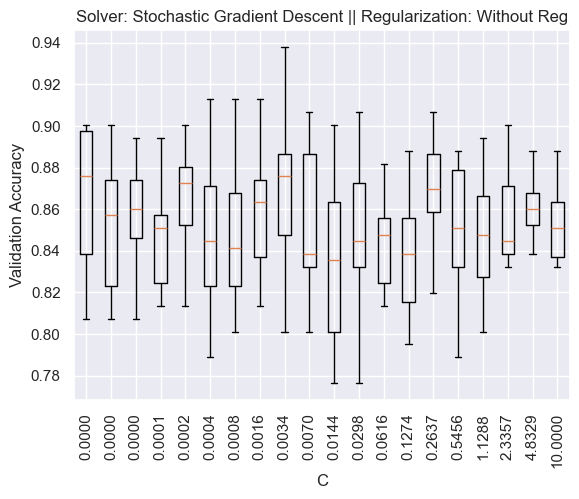

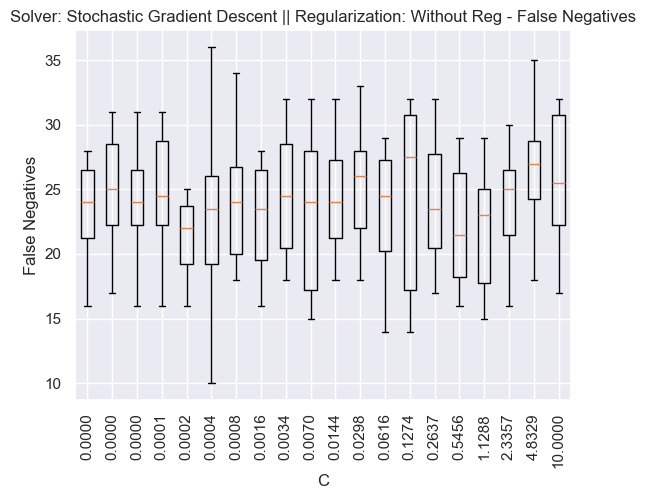

Best C value for Without Reg regularization (Accuracy): 0.00018329807108324357 with an accuracy of 0.8683229813664596
Best C value for Without Reg regularization (False Negatives): 0.00018329807108324357 with 21.2 false negatives


In [161]:
regs = ['l1', 'l2', 'elastic_net', 'none']
rregs = {'l1': 'L1', 'l2': 'L2', 'elastic_net': 'L1 + L2', 'none': 'Without Reg'}

cv_object = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for reg1 in regs:
    def lr_explor(cost):
        lr_clf = MultiClassLogisticRegression(eta=0.1, iterations=100, C=float(cost), solver='sgd', reg=reg1)        
        acc = []
        false_negatives = []
        for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_array, y)):
            lr_clf.fit(X_array[train_indices], y[train_indices]) 
            y_hat = lr_clf.predict(X_array[test_indices])
            acc.append(mt.accuracy_score(y[test_indices], y_hat))
            cm = mt.confusion_matrix(y[test_indices], y_hat)
            fn = cm.sum(axis=1) - np.diag(cm)  
            false_negatives.append(fn.sum()) 
        
        return np.array(acc), np.array(false_negatives)

    costs = np.logspace(-5, 1, 20)
    accs = []
    fns = []
    for c in costs:
        acc_mean, fn_mean = lr_explor(c)
        accs.append(acc_mean.mean())
        fns.append(fn_mean.mean()) 
    
    best_acc_index = np.argmax(accs)
    best_fn_index = np.argmin(fns)
    
    best_c_acc = costs[best_acc_index]
    best_acc = accs[best_acc_index]

    best_c_fn = costs[best_fn_index]
    best_fn = fns[best_fn_index]

    # Plot accuracies using different C values
    plt.boxplot([lr_explor(c)[0] for c in costs], showfliers=False)  # Regenerate accuracy data for boxplot
    plt.xticks(range(1, len(costs) + 1), ['%.4f' % c for c in costs], rotation='vertical')
    plt.title(f'Solver: Stochastic Gradient Descent || Regularization: {rregs[reg1]}')
    plt.xlabel('C')
    plt.ylabel('Validation Accuracy')
    plt.show()

    # Plot false negatives using different C values
    plt.boxplot([lr_explor(c)[1] for c in costs], showfliers=False)  # Regenerate FN data for boxplot
    plt.xticks(range(1, len(costs) + 1), ['%.4f' % c for c in costs], rotation='vertical')
    plt.title(f'Solver: Stochastic Gradient Descent || Regularization: {rregs[reg1]} - False Negatives')
    plt.xlabel('C')
    plt.ylabel('False Negatives')
    plt.show()

    print(f"Best C value for {rregs[reg1]} regularization (Accuracy): {best_c_acc} with an accuracy of {best_acc}")
    print(f"Best C value for {rregs[reg1]} regularization (False Negatives): {best_c_fn} with {best_fn} false negatives")


<h4>2.2.3 Newton's method / Hessian</h4>

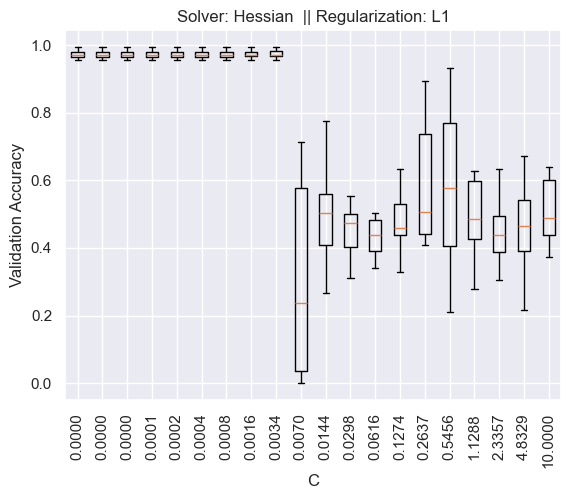

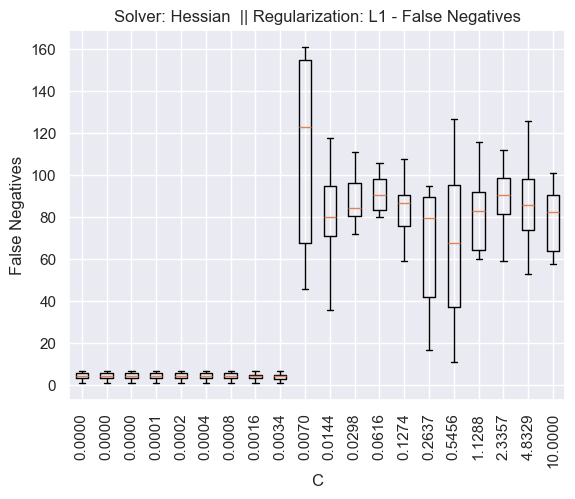

Best C value for L1 regularization (Accuracy): 0.003359818286283781 with an accuracy of 0.9714285714285715
Best C value for L1 regularization (False Negatives): 0.003359818286283781 with 4.6 false negatives


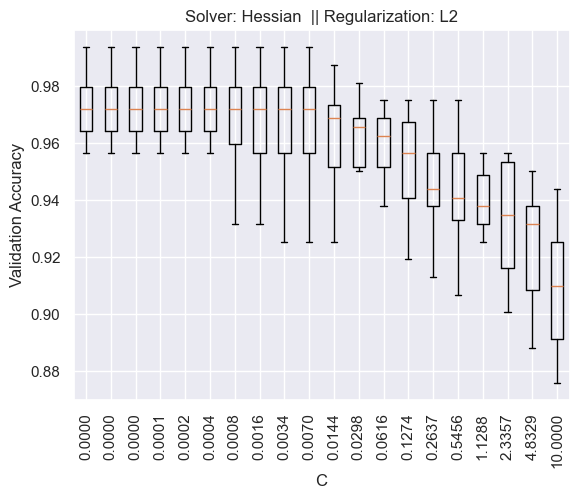

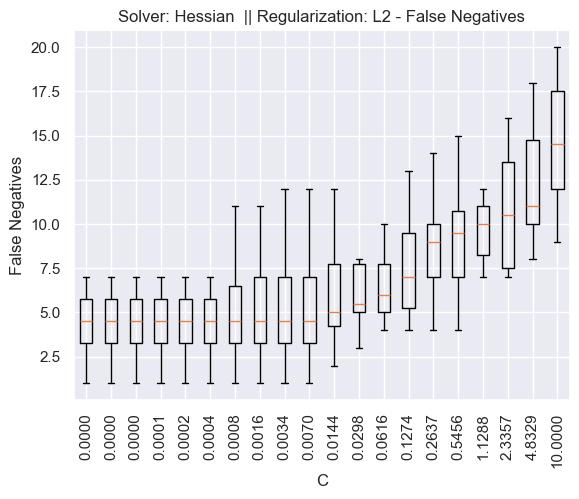

Best C value for L2 regularization (Accuracy): 1e-05 with an accuracy of 0.9695652173913045
Best C value for L2 regularization (False Negatives): 1e-05 with 4.9 false negatives


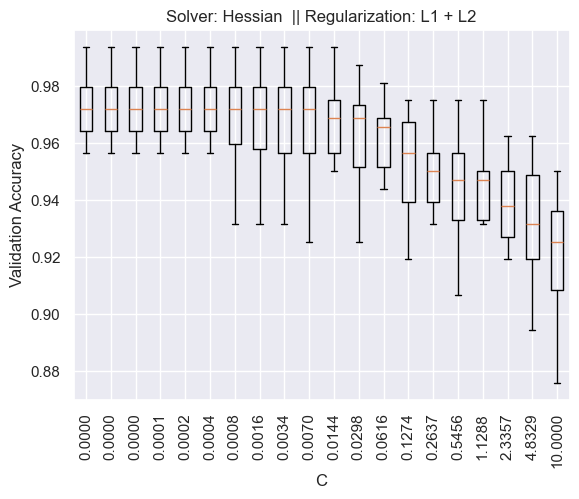

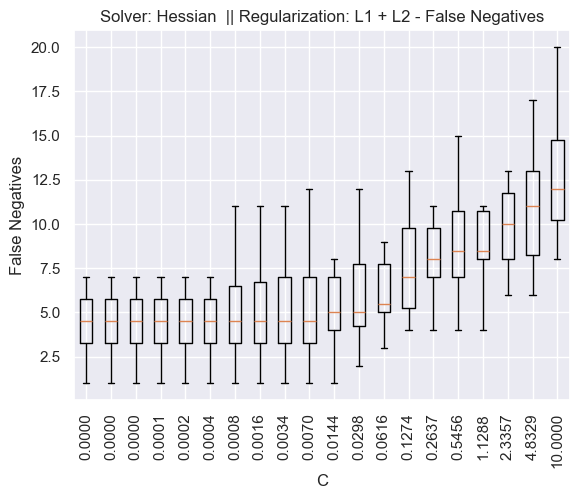

Best C value for L1 + L2 regularization (Accuracy): 1e-05 with an accuracy of 0.9695652173913045
Best C value for L1 + L2 regularization (False Negatives): 1e-05 with 4.9 false negatives


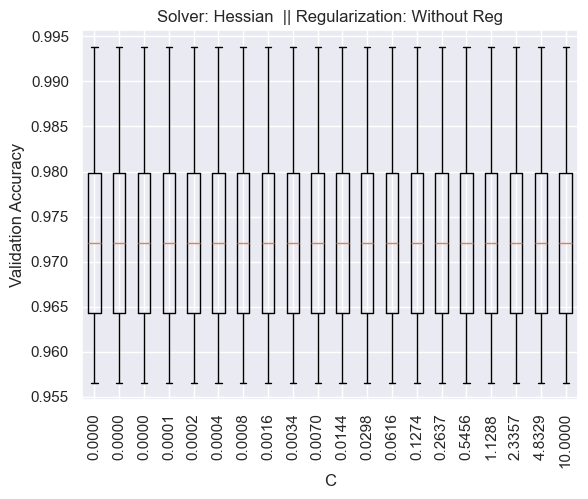

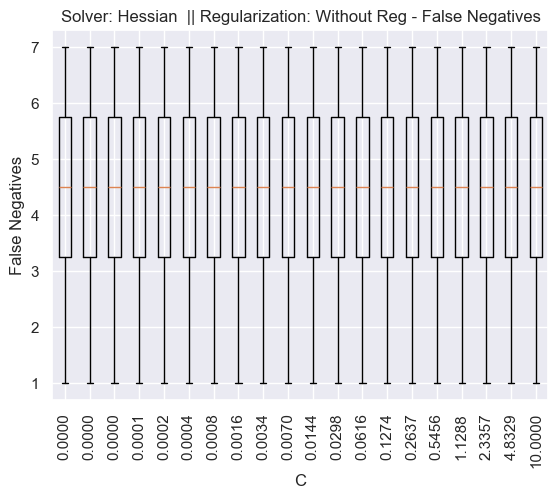

Best C value for Without Reg regularization (Accuracy): 1e-05 with an accuracy of 0.9695652173913045
Best C value for Without Reg regularization (False Negatives): 1e-05 with 4.9 false negatives


In [162]:
regs = ['l1', 'l2', 'elastic_net', 'none']
rregs = {'l1': 'L1', 'l2': 'L2', 'elastic_net': 'L1 + L2', 'none': 'Without Reg'}


cv_object = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for reg1 in regs:
    def lr_explor(cost):
        lr_clf = MultiClassLogisticRegression(eta=0.1, iterations=100, C=float(cost), solver='hessian', reg=reg1)        
        acc = []
        false_negatives = []
        for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_array, y)):
            lr_clf.fit(X_array[train_indices], y[train_indices])
            y_hat = lr_clf.predict(X_array[test_indices])
            
            acc.append(mt.accuracy_score(y[test_indices], y_hat))
            
            cm = mt.confusion_matrix(y[test_indices], y_hat)
            fn = cm.sum(axis=1) - np.diag(cm)  
            false_negatives.append(fn.sum())
        
        return np.array(acc), np.array(false_negatives)

    costs = np.logspace(-5, 1, 20)
    accs = []
    fns = []
    for c in costs:
        acc_mean, fn_mean = lr_explor(c)
        accs.append(acc_mean.mean()) 
        fns.append(fn_mean.mean())  
    
    best_acc_index = np.argmax(accs)
    best_fn_index = np.argmin(fns)
    
    best_c_acc = costs[best_acc_index]
    best_acc = accs[best_acc_index]

    best_c_fn = costs[best_fn_index]
    best_fn = fns[best_fn_index]

    # Plot accuracies using different C values
    plt.boxplot([lr_explor(c)[0] for c in costs], showfliers=False)  
    plt.xticks(range(1, len(costs) + 1), ['%.4f' % c for c in costs], rotation='vertical')
    plt.title(f'Solver: Hessian  || Regularization: {rregs[reg1]}')
    plt.xlabel('C')
    plt.ylabel('Validation Accuracy')
    plt.show()

    # Plot false negatives using different C values
    plt.boxplot([lr_explor(c)[1] for c in costs], showfliers=False)  # Regenerate FN data for boxplot
    plt.xticks(range(1, len(costs) + 1), ['%.4f' % c for c in costs], rotation='vertical')
    plt.title(f'Solver: Hessian  || Regularization: {rregs[reg1]} - False Negatives')
    plt.xlabel('C')
    plt.ylabel('False Negatives')
    plt.show()

    print(f"Best C value for {rregs[reg1]} regularization (Accuracy): {best_c_acc} with an accuracy of {best_acc}")
    print(f"Best C value for {rregs[reg1]} regularization (False Negatives): {best_c_fn} with {best_fn} false negatives")


<p>Based on the figures presented earlier, the best performance can be achieved using Newton's method / Hessian solver in conjunction with L2 regularization, with a \( C \) value of \( 1 \times 10^{-5} \), achieving an accuracy of 97.0%. Additionally, this configuration yielded a low average of 4.8 false negatives, highlighting its effectiveness in minimizing errors of this type. Furthermore, the Hessian solver with L2 regularization demonstrated a consistent trend where accuracy decreased as \( C \) increased, a pattern often observed in model training. Consequently, these parameters will be regarded as the optimal combination and will be employed for subsequent comparison with the Scikit-learn model.</p>      

<h4>Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?</h4>
<p>Yes, an exhaustive search for optimal parameters can indeed involve "data snooping." Data snooping occurs when data that ideally should remain unseen during model training is inadvertently used during the development process. With multiple iterations on the dataset for model selection, the chance of identifying a model with high performance increases, potentially due more to random chance than to the model's true predictive power. This repeated exposure to the data raises the risk of fitting to patterns that may not generalize, ultimately skewing model evaluation.</p>


<h2>2.3 Comparing With Scikit Learn</h2>
<p>In this section, we compare our optimized logistic regression model against the standard model available in Scikit-Learn. To conduct this analysis, we utilize newton-cg solver from the Scikit-Learn framework, providing a comprehensive evaluation of model performance across different optimization methods.</p>

In [163]:
%%time
cv_object = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_clf =  SKLogisticRegression(solver='newton-cg', n_jobs=1, multi_class='ovr', 
                             C=1/1e-05, penalty='l2', max_iter=100)
accuracy_1 = []
fn_1 = []
for train_indices, test_indices in cv_object.split(X_array, y):
    lr_clf.fit(X_array[train_indices], y[train_indices])  # Train model
    y_hat = lr_clf.predict(X_array[test_indices])  # Get test set predictions
    acc = accuracy_score(y[test_indices], y_hat)
    accuracy_1.append(acc)
    cm = confusion_matrix(y[test_indices], y_hat)
    fn = cm.sum(axis=1) - np.diag(cm)
    fn_1.append(fn.sum())
avg_accuracy = np.mean(accuracy_1)
total_false_negatives = sum(fn_1)
print("\nAverage accuracy for 10-fold (10% test data, 90% training data) split is", avg_accuracy,
      "with total false negatives:", total_false_negatives)



Average accuracy for 10-fold (10% test data, 90% training data) split is 0.9677018633540374 with total false negatives: 52
CPU times: total: 344 ms
Wall time: 343 ms


In [164]:
%%time
cv_object = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lr_clf = MultiClassLogisticRegression(eta=0.1, iterations=100, C=1e-05, solver='hessian', reg='l2')
accuracy_1 = []
fn_1 = []
for train_indices, test_indices in cv_object.split(X_array, y):
    lr_clf.fit(X_array[train_indices], y[train_indices])  # Train model
    y_hat = lr_clf.predict(X_array[test_indices])  # Get test set predictions
    acc = accuracy_score(y[test_indices], y_hat)
    accuracy_1.append(acc)
    cm = confusion_matrix(y[test_indices], y_hat)
    fn = cm.sum(axis=1) - np.diag(cm)
    fn_1.append(fn.sum())
avg_accuracy = np.mean(accuracy_1)
total_false_negatives = sum(fn_1)
print("\nAverage accuracy for 10-fold (10% test data, 90% training data) split is", avg_accuracy,
      "with total false negatives:", total_false_negatives)



Average accuracy for 10-fold (10% test data, 90% training data) split is 0.9695652173913045 with total false negatives: 49
CPU times: total: 2min 40s
Wall time: 25.5 s


<h4>The performance comparison between our "best" logistic regression optimization procedure to the procedure used in scikit-learn :</h4>
<p>As shown above, our model achieved performance similar to Scikit-learn's Newton solver, which is expected since both methods use the same solver. However, it is worth mentioning that the Scikit-learn model was more computationally efficient and faster.</p>

<h1>3. Deployment</h1>

<h4>Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn?</h4>

<p>While our best model achieved similar performance to the Scikit-learn-based model, we recommend using the Scikit-learn model for deployment because it is faster and computationally more efficient. Additionally, Scikit-learn provides a broader range of optimization techniques that may further enhance accuracy.</p>

In [ ]:
comparison = pd.DataFrame()
comparison['Metric'] = ['Accuracy', 'False Negatives', 'Wall time']

comparison['Our Best Model (Hessian)'] = [
    0.9937888198757764, 1, '2min 9s'
]

comparison['SK (newton-cg)'] = [
    0.9937888198757764, 1, '287 ms'
]

comparison = comparison.set_index('Metric').T
comparison


<h1>4. Logistic regression using mean square error</h1>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            padding: 20px;
        }
    </style>
</head>
<body>

<p>Mean square error (MSE) as the objective function with a L2 regularization term is defined as:</p>

<p>
    \( L = MSE = \frac{1}{M} \sum_{i=1}^{M} \left( y^{(i)} - g\left( \mathbf{w}^T x^{(i)} \right) \right)^2 \)
</p>

<p>The gradient is</p>

<p>
    \( \frac{\partial L}{\partial w_j} = \frac{1}{M} \sum_{i=1}^{M} 2\left(y^{(i)} - g\left( \mathbf{w}^T x^{(i)} \right)\right)\left[-g\left( \mathbf{w}^T x^{(i)} \right)\left(1 - g\left( \mathbf{w}^T x^{(i)} \right)\right)x_j^{(i)} \right] \)
</p>

<p>
    Notice that \( \hat{y}^{(i)} = g(\mathbf{w}^T x^{(i)}) \). To simplify the notations, let \( g \) denote \( g(\mathbf{w}^T x^{(i)}) \). Then,
</p>

<p>
    \( \frac{\partial L}{\partial w_j} = \frac{1}{M} \sum_{i=1}^{M} \left( 2(y^{(i)} - g)\left[ -g(1 - g)x_j^{(i)} \right] \right) \)
</p>

<p>
    \( \nabla l(\mathbf{w}) = \frac{1}{M} (-2)X^T \cdot (y_{diff} \ast \hat{y} \ast (1 - \hat{y})) \)
</p>

<p>Where:</p>

<ul>
    <li>(·) indicates matrix multiplication, (∗) indicates element-wise multiplication.</li>
    <li>\( y_{diff} = y - \hat{y} \)</li>
    <li> \( g = \hat{y} \)</li>
</ul>

<p>The coefficients update equation is:</p>

<p>
    \( \mathbf{w} \leftarrow \mathbf{w} - \eta \nabla l(\mathbf{w}) \)
</p>

<h4>Newton's Update Method</h4>

<p>To implement an optimization technique, we use a new update that is defined by Newton's method:</p>

<p class="centered">
    \( \mathbf{w} \leftarrow \mathbf{w} - \left[ \frac{\partial^2}{\partial \mathbf{w}} l(\mathbf{w}) \right]^{-1} \frac{\partial}{\partial \mathbf{w}} l(\mathbf{w}) \)
</p>


<p>In multiple dimensions, we can approximate the update as:</p>

<p class="centered">
    \( \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \mathbf{H}(\mathbf{w})^{-1} \cdot \nabla l(\mathbf{w}) \)
</p>
<p class="centered">
    
</p>

<p>where the Hessian is defined as follows for any multivariate equation \( l(\mathbf{w}) \):</p>

<p class="centered">
    \( \nabla^2 l(\mathbf{w}) = \mathbf{H}(\mathbf{w}) \)
</p>

<p class="centered">
    \( \mathbf{H}(\mathbf{w}) = \begin{bmatrix} 
    \frac{\partial^2}{\partial w_1^2} l(\mathbf{w}) & \frac{\partial^2}{\partial w_1 \partial w_2} l(\mathbf{w}) & \dots & \frac{\partial}{\partial w_1 \partial w_N} l(\mathbf{w}) \\
    \frac{\partial^2}{\partial w_2 \partial w_1} l(\mathbf{w}) & \frac{\partial^2}{\partial w_2^2} l(\mathbf{w}) & \dots & \frac{\partial}{\partial w_2 \partial w_N} l(\mathbf{w}) \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\partial^2}{\partial w_N \partial w_1} l(\mathbf{w}) & \frac{\partial^2}{\partial w_N \partial w_2} l(\mathbf{w}) & \dots & \frac{\partial^2}{\partial w_N^2} l(\mathbf{w}) \\
    \end{bmatrix} \)
</p>



<p>For logistic regression, we can calculate the formula for the \( j^{th} \) and \( k^{th} \) element of the Hessian as follows:</p>

<p class="centered">
    \( \mathbf{H}_{j,k}(\mathbf{w}) = \frac{\partial}{\partial w_k} \frac{\partial}{\partial w_j} l(\mathbf{w}) \)
</p>
<p class="centered"></p>

<p>But we already know the result of the \( j^{th} \) partial derivative from our calculation of \( \nabla l(\mathbf{w}) \):</p>

<p class="centered">
    \( \frac{\partial}{\partial w_j} l(\mathbf{w}) = \frac{1}{M} \sum_{i=1}^{M} 2 \left( y^{(i)} - g \right) \left[ -g(1 - g)x_j^{(i)} \right] \)
</p>

<p>For logistic regression, we can calculate the formula for the \( j^{th} \) and \( k^{th} \) element of the Hessian as follows:</p>

<p class="centered">
    \( \mathbf{H}_{j,k}(\mathbf{w}) = \frac{\partial}{\partial w_k} \frac{\partial}{\partial w_j} l(\mathbf{w}) \)
</p>
<p class="centered"></p>

<p>So we can get the second partial derivatives:</p>

<p class="centered">
    \( \mathbf{H}_{j,k}(\mathbf{w}) = \frac{\partial}{\partial w_k} \frac{\partial}{\partial w_j} L \)
</p>
<p class="centered"></p>

<p class="centered">
    \( = -2 \sum_{i=1}^{M} x_k^{(i)} x_j^{(i)} \left\{ \left( y^{(i)} + y \ast 2g - 2g - 2g - 3g^3 \right) \ast g \ast (1 - g) \right\} \)
</p>

<p>More succinctly, we can derive the vectorized form:</p>

<p class="centered">
    \( \mathbf{H}[L(\mathbf{w})] = -2 \ast \mathbf{X}^T \cdot \text{diag} \left[ (y + y \ast 2g - 2g - 3g^3) \ast g \ast (1 - g) \right] \cdot \mathbf{X} \)
</p>


<p>Now we can place the Hessian derivation into the Newton Update Equation, like this:</p>

<p class="centered">
    \( \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \mathbf{H}[L(\mathbf{w})]^{-1} \cdot \nabla l(\mathbf{w}) \)
</p>
<p class="centered"></p>



<p>Adding in the exact equations for the Hessian and gradient, we can finally get:</p>

<p class="centered">
    \( \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \left\{ -2 \ast \mathbf{X}^T \cdot \text{diag} \left[ (y + y \ast 2g - 2g - 3g^3) \ast g \ast (1 - g) \right] \cdot \mathbf{X} \right\}^{-1} \cdot \mathbf{X} \circ y_{diff} \)
</p>

<p class="centered"></p>

</body>
</html>


<h4>4.1 preferred process</h4>
<p>To determine our preferred process between maximum likelihood and minimum mean-squared error, we will compare the accuracy and computation time of Hessian mean-squared error and Hessian likelihood, using the same parameters for both methods.</p>

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y,test_size=0.1)

In [690]:
%%time
lr = MultiClassLogisticRegression(eta=0.1,
                                  iterations=100,
                                  C=1e-05,
                                  solver='HessianMSE',reg ='l2'
                                 )
lr.fit(X_train,y_train)

yhat_MSE = lr.predict(X_test)
accuracy_MSE = accuracy_score(y_test, yhat_MSE)
precision_MSE  = precision_score(y_test, yhat_MSE, average='weighted')
recall_MSE  = recall_score(y_test, yhat_MSE, average='weighted')
f1_MSE  = f1_score(y_test, yhat_MSE, average='weighted')

CPU times: total: 15.4 s
Wall time: 2.55 s


In [691]:
%%time
lr = MultiClassLogisticRegression(eta=0.1, iterations=100, C=1e-05, solver='hessian', reg='l2')
    
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
accuracy_hessian = accuracy_score(y_test, y_pred)
precision_hessian  = precision_score(y_test, y_pred, average='weighted')
recall_hessian  = recall_score(y_test, y_pred, average='weighted')
f1_hessian  = f1_score(y_test, y_pred, average='weighted')

CPU times: total: 15.5 s
Wall time: 2.42 s


In [692]:
comparison = pd.DataFrame()

comparison[''] = ['Accuracy'] + ['Precision']+['Recall']+['F1']

comparison['Hessian maximum likelihood'] = [accuracy_hessian]+[precision_hessian]+[recall_hessian]+[f1_hessian]

comparison['Hessian MSE'] = [accuracy_MSE]+[precision_MSE]+[recall_MSE]+[f1_MSE] 


comparison.T

,0,1,2,3
,Accuracy,Precision,Recall,F1
Hessian maximum likelihood,0.975155,0.975387,0.975155,0.974786
Hessian MSE,0.714286,0.743169,0.714286,0.700463


<h4>which process do you prefer: maximum likelihood OR minimum mean-squared error ?</h4>
<p>Based on the accuracy values shown in the table, the model using the maximum likelihood criterion achieves higher accuracy, making it our preferred choice over the model that minimizes mean squared error. Additionally, the non-convexity of the mean squared error function in logistic regression complicates convergence, especially when using gradient descent.</p>

<h2>
5. References</h2>
<ul>
<li>Kaggle. Obesity Dataset:<a href="https://www.kaggle.com/datasets/suleymansulak/obesity-dataset"> https://www.kaggle.com/datasets/suleymansulak/obesity-dataset</a></li> 
<li>Dr.Larson codes: <a href=https://github.com/eclarson/MachineLearningNotebooks> https://github.com/eclarson/MachineLearningNotebooks</a></li>  
 <li>Using Mean squared error loss (MSE) in Logistic Regression <a href=https://medium.com/@pranav.kushare2001/using-mean-squared-error-loss-mse-in-logistic-regression-bcc5e07a6d99> https://medium.com/@pranav.kushare2001/using-mean-squared-error-loss-mse-in-logistic-regression-bcc5e07a6d99</a></li>   
<li>Data Snooping. <a href=https://datascience.stanford.edu/news/data-snooping#:~:text> https://datascience.stanford.edu/news/data-snooping#:~:text=Data%20snooping%20is%20a%20form,nature%20of%20all%20statistical%20tests.</a></li>

